In [171]:
#Import necessary Libraries


import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as SM
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, plot_confusion_matrix #Model Evaluation technique
from sklearn.model_selection import train_test_split                           #Train-test split

%matplotlib inline  
color = sns.color_palette()
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
# Remove warnings

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [172]:
#Read the dataset
df = pd.read_excel('Company_Data2015.xlsx')

#Checking the head of the dataset
df.head()

Co_Code          Co_Name  Networth Next Year  Equity Paid Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital Employed  Total Debt  Gross Block   Net Working Capital   \
0          -1007.24     5936.03        474.30              -1076.34   
1           4458.20     7410.18       9070.86              -1098.88   
2           7714.68     6944.54       1281.54               4496.25   
3           2353.88     2326.05       1033.69              -2612.42   
4           4675.33     5740.90       1084.20               1836.23   

   Current Assets   Current Liabilities and Provisions   \
0            40.50                              1116.85   
1           486.86                              1585.74   
2          9097.64                              4601.39   
3          1034.12                              3646.54   
4          4685.81                              2849.58   

   Total Assets/Liabilities   Gross Sales  Net Sales  Other Income  \
0                     109.60         0.00       0.00          7.60   
1                    6043.94      2892.73    2892.73         46.27   
2                   12316.07       392.13     392.13          9.55   
3                    6000.42      1354.39    1354.39        223.85   
4                    7524.91        38.72      38.72          9.82   

   Value Of Output  Cost of Production  Selling Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted PAT      CP  Revenue earnings in forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue expenses in forex  Capital expenses in forex  \
0                       0.00                       0.00   
1                     143.42                     141.17   
2                      86.36                       2.27   
3                      28.88                       0.00   
4                      15.62                       0.00   

   Book Value (Unit Curr)  Book Value (Adj.) (Unit Curr)  \
0                 -167.58                        -167.58   
1                  -15.18                         -15.18   
2                   94.14                          94.14   
3                  -39.64                         -39.64   
4                 -212.89                        -212.89   

   Market Capitalisation  CEPS (annualised) (Unit Curr)  \
0                   0.00                         -22.09   
1                1544.39                          -0.02   
2                1220.81                        -148.31   
3                 194.27                         -43.08   
4                 113.68                        -159.50   

   Cash Flow From Operating Activities  Cash Flow From Investing Activities  \
0                              -102.47                                 1.46   
1                               635.91                              -785.00   
2                              -873.40                              -458.27   
3                               324.

In [173]:
df_dict = pd.read_excel('Data_Dictionary.xlsx')
df_dict

S.No                           Field Name  \
0      1                              Co_Code   
1      2                              Co_Name   
2      3                   Networth Next Year   
3      4                       Equity Paid Up   
4      5                             Networth   
5      6                     Capital Employed   
6      7                           Total Debt   
7      8                         Gross Block    
8      9                 Net Working Capital    
9     10                      Current Assets    
10    11  Current Liabilities and Provisions    
11    12            Total Assets/Liabilities    
12    13                          Gross Sales   
13    14                            Net Sales   
14    15                         Other Income   
15    16                      Value Of Output   
16    17                   Cost of Production   
17    18                         Selling Cost   
18    19                                PBIDT   
19    20                                 PBDT   
20    21                                 PBIT   
21    22                                  PBT   
22    23                                  PAT   
23    24                         Adjusted PAT   
24    26                                   CP   
25    27            Revenue earnings in forex   
26    28            Revenue expenses in forex   
27    29            Capital expenses in forex   
28    30               Book Value (Unit Curr)   
29    31        Book Value (Adj.) (Unit Curr)   
30    32                Market Capitalisation   
31    33        CEPS (annualised) (Unit Curr)   
32    34  Cash Flow From Operating Activities   
33    35  Cash Flow From Investing Activities   
34    36  Cash Flow From Financing Activities   
35    37                    ROG-Net Worth (%)   
36    38             ROG-Capital Employed (%)   
37    39                  ROG-Gross Block (%)   
38    40                  ROG-Gross Sales (%)   
39    41                    ROG-Net Sales (%)   
40    42           ROG-Cost of Production (%)   
41    43                 ROG-Total Assets (%)   
42    44                        ROG-PBIDT (%)   
43    45                         ROG-PBDT (%)   
44    46                         ROG-PBIT (%)   
45    47                          ROG-PBT (%)   
46    48                          ROG-PAT (%)   
47    49                           ROG-CP (%)   
48    50    ROG-Revenue earnings in forex (%)   
49    51    ROG-Revenue expenses in forex (%)   
50    52        ROG-Market Capitalisation (%)   
51    53                Current Ratio[Latest]   
52    54           Fixed Assets Ratio[Latest]   
53    55              Inventory Ratio[Latest]   
54    56                Debtors Ratio[Latest]   
55    57   Total Asset Turnover Ratio[Latest]   
56    58         Interest Cover Ratio[Latest]   
57    59                   PBIDTM (%)[Latest]   
58    60                    PBITM (%)[Latest]   
59    61                    PBDTM (%)[Latest]   
60    62                      CPM (%)[Latest]   
61    63                    APATM (%)[Latest]   
62    64              Debtors Velocity (Days)   
63    65            Creditors Velocity (Days)   
64    66            Inventory Velocity (Days)   
65    67         Value of Output/Total Assets   
66    68          Value of Output/Gross Block   

                                          Description  \
0                                        Company Code   
1                                        Company Name   
2   Value of a company as on 2016 - Next Year(diff...   
3   Amount that has been received by the company t...   
4        Value of a company as on 2015 - Current Year   
5   Total amount of capital used for the acquisiti...   
6   The sum of money borrowed by the company and i...   
7   Total value of all of the assets that a compan...   
8   The difference between a company's current ass...   
9   All the assets of a company that are expected ...   
10  Short-term financial obligations that ar

### Fixing Column names containing spaces & other special characters for ease of use

In [174]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[', '_').str.replace(']', '').str.replace('-', '_')

In [175]:
df.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Current_Assets  Current_Liabilities_and_Provisions  \
0           40.50                             1116.85   
1          486.86                             1585.74   
2         9097.64                             4601.39   
3         1034.12                             3646.54   
4         4685.81                             2849.58   

   Total_Assets_by_Liabilities  Gross_Sales  Net_Sales  Other_Income  \
0                       109.60         0.00       0.00          7.60   
1                      6043.94      2892.73    2892.73         46.27   
2                     12316.07       392.13     392.13          9.55   
3                      6000.42      1354.39    1354.39        223.85   
4                      7524.91        38.72      38.72          9.82   

   Value_Of_Output  Cost_of_Production  Selling_Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted_PAT      CP  Revenue_earnings_in_forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue_expenses_in_forex  Capital_expenses_in_forex  Book_Value_Unit_Curr  \
0                       0.00                       0.00               -167.58   
1                     143.42                     141.17                -15.18   
2                      86.36                       2.27                 94.14   
3                      28.88                       0.00                -39.64   
4                      15.62                       0.00               -212.89   

   Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
0                    -167.58                   0.00   
1                     -15.18                1544.39   
2                      94.14                1220.81   
3                     -39.64                 194.27   
4                    -212.89                 113.68   

   CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
0                     -22.09                              -102.47   
1                      -0.02                               635.91   
2                    -148.31                              -873.40   
3                     -43.08                               324.47   
4                    -159.50                              -191.54   

   Cash_Flow_From_Investing_Activities  Cash_Flow_From_Financing_Activities  \
0                                 1.46                                92.58   
1                              -785.00      

## Shape of the data:

In [176]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

## Statistical discription of dataset:

In [178]:
df.describe().T

count          mean            std  \
Co_Code                              3586.0  16065.388734   19776.817379   
Networth_Next_Year                   3586.0    725.045251    4769.681004   
Equity_Paid_Up                       3586.0     62.966584     778.761744   
Networth                             3586.0    649.746299    4091.988792   
Capital_Employed                     3586.0   2799.611054   26975.135385   
Total_Debt                           3586.0   1994.823779   23652.842746   
Gross_Block                          3586.0    594.178829    4871.547802   
Net_Working_Capital                  3586.0    410.809665    6301.218546   
Current_Assets                       3586.0   1960.349172   22577.570829   
Current_Liabilities_and_Provisions   3586.0    391.992078    2675.001631   
Total_Assets_by_Liabilities          3586.0   1778.453751   11437.574690   
Gross_Sales                          3586.0   1123.738985   10603.703837   
Net_Sales                            3586.0   1079.702579    9996.574173   
Other_Income                         3586.0     48.729824     426.040665   
Value_Of_Output                      3586.0   1077.187292    9843.880293   
Cost_of_Production                   3586.0    798.544621    9076.702982   
Selling_Cost                         3586.0     25.554997     194.244466   
PBIDT                                3586.0    248.175282    1949.593350   
PBDT                                 3586.0    116.268795     956.199566   
PBIT                                 3586.0    217.659395    1850.972782   
PBT                                  3586.0     85.752909     799.925768   
PAT                                  3586.0     61.218313     620.298432   
Adjusted_PAT                         3586.0     60.058963     580.432912   
CP                                   3586.0     91.734200     780.790561   
Revenue_earnings_in_forex            3586.0    131.165270    1150.730209   
Revenue_expenses_in_forex            3586.0    256.327002    4132.339619   
Capital_expenses_in_forex            3586.0      7.655689     111.432070   
Book_Value_Unit_Curr                 3586.0    157.237836    1622.664105   
Book_Value_Adj._Unit_Curr            3582.0   2243.152917  128283.728186   
Market_Capitalisation                3586.0   1664.092387   12805.173084   
CEPS_annualised_Unit_Curr            3586.0     36.018709     828.420796   
Cash_Flow_From_Operating_Activities  3586.0     65.770750    1455.048376   
Cash_Flow_From_Investing_Activities  3586.0    -60.870365     701.974713   
Cash_Flow_From_Financing_Activities  3586.0     11.436453    1272.257361   
ROG_Net_Worth_perc                   3586.0   1237.624576   41041.930017   
ROG_Capital_Employed_perc            3586.0   2988.884612  126472.870285   
ROG_Gross_Block_perc                 3586.0     37.554306     893.619402   
ROG_Gross_Sales_perc                 3586.0    242.672962    6103.527897   
ROG_Net_Sales_perc                   3586.0    242.588530    6103.487655   
ROG_Cost_of_Production_perc          3586.0    310.488405    5573.215095   
ROG_Total_Assets_perc                3586.0   2793.282621  125941.653747   
ROG_PBIDT_perc                       3586.0    375.852181   23278.396117   
ROG_PBDT_perc                        3586.0    336.379947   20353.396660   
ROG_PBIT_perc                        3586.0    374.699958   22462.789381   
ROG_PBT_perc                         3586.0    224.070248   19659.232661   
ROG_PAT_perc                         3586.0    112.231654   13480.515287   
ROG_CP_perc                          3586.0    221.091523   13980.202791   
ROG_Revenue_earnings_in_forex_perc   3586.0     37.227844     658.666041   
ROG_Revenue_expenses_in_forex_perc   3586.0    364.863221   15233.643027   
ROG_Market_Capitalisation_perc       3586.0     63.682220    1047.928144   
Current_Ratio_Latest                 3585.0     12.056603     108.410131   
Fixed_Assets_Ratio_Latest            3585.0     51.538840     681.150910   
Inventory_

### Checking for Duplicate values in dataset:

In [179]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Co_Code, Co_Name, Networth_Next_Year, Equity_Paid_Up, Networth, Capital_Employed, Total_Debt, Gross_Block, Net_Working_Capital, Current_Assets, Current_Liabilities_and_Provisions, Total_Assets_by_Liabilities, Gross_Sales, Net_Sales, Other_Income, Value_Of_Output, Cost_of_Production, Selling_Cost, PBIDT, PBDT, PBIT, PBT, PAT, Adjusted_PAT, CP, Revenue_earnings_in_forex, Revenue_expenses_in_forex, Capital_expenses_in_forex, Book_Value_Unit_Curr, Book_Value_Adj._Unit_Curr, Market_Capitalisation, CEPS_annualised_Unit_Curr, Cash_Flow_From_Operating_Activities, Cash_Flow_From_Investing_Activities, Cash_Flow_From_Financing_Activities, ROG_Net_Worth_perc, ROG_Capital_Employed_perc, ROG_Gross_Block_perc, ROG_Gross_Sales_perc, ROG_Net_Sales_perc, ROG_Cost_of_Production_perc, ROG_Total_Assets_perc, ROG_PBIDT_perc, ROG_PBDT_perc, ROG_PBIT_perc, ROG_PBT_perc, ROG_PAT_perc, ROG_CP_perc, ROG_Revenue_earnings_in_forex_perc, ROG_Revenue_expenses_in_forex_perc, ROG_Market_Capitalisation_perc, Current_Ratio_Latest, Fixed_Assets_Ratio_Latest, Inventory_Ratio_Latest, Debtors_Ratio_Latest, Total_Asset_Turnover_Ratio_Latest, Interest_Cover_Ratio_Latest, PBIDTM_perc_Latest, PBITM_perc_Latest, PBDTM_perc_Latest, CPM_perc_Latest, APATM_perc_Latest, Debtors_Velocity_Days, Creditors_Velocity_Days, Inventory_Velocity_Days, Value_of_Output_by_Total_Assets, Value_of_Output_by_Gross_Block]
Index: []

### Introducing a new column "Default" where its values are either 0 or 1 depending on column "Networth_Next_Year" is positive or negative... "Default" will be the final Dependent (target) variable.

In [180]:
df["Default"] = df["Networth_Next_Year"]
df["Default"]=df["Default"].astype('int64')

In [181]:
df.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Current_Assets  Current_Liabilities_and_Provisions  \
0           40.50                             1116.85   
1          486.86                             1585.74   
2         9097.64                             4601.39   
3         1034.12                             3646.54   
4         4685.81                             2849.58   

   Total_Assets_by_Liabilities  Gross_Sales  Net_Sales  Other_Income  \
0                       109.60         0.00       0.00          7.60   
1                      6043.94      2892.73    2892.73         46.27   
2                     12316.07       392.13     392.13          9.55   
3                      6000.42      1354.39    1354.39        223.85   
4                      7524.91        38.72      38.72          9.82   

   Value_Of_Output  Cost_of_Production  Selling_Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted_PAT      CP  Revenue_earnings_in_forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue_expenses_in_forex  Capital_expenses_in_forex  Book_Value_Unit_Curr  \
0                       0.00                       0.00               -167.58   
1                     143.42                     141.17                -15.18   
2                      86.36                       2.27                 94.14   
3                      28.88                       0.00                -39.64   
4                      15.62                       0.00               -212.89   

   Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
0                    -167.58                   0.00   
1                     -15.18                1544.39   
2                      94.14                1220.81   
3                     -39.64                 194.27   
4                    -212.89                 113.68   

   CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
0                     -22.09                              -102.47   
1                      -0.02                               635.91   
2                    -148.31                              -873.40   
3                     -43.08                               324.47   
4                    -159.50                              -191.54   

   Cash_Flow_From_Investing_Activities  Cash_Flow_From_Financing_Activities  \
0                                 1.46                                92.58   
1                              -785.00      

In [182]:
for i in range(len(df)):
    if df.loc[i,"Networth_Next_Year"] <= 0:
        df.loc[i,"Default"] = 1
    else:
        df.loc[i,"Default"] = 0

In [183]:
df[["Networth_Next_Year","Default"]]

Networth_Next_Year  Default
0               -8021.60        1
1               -3986.19        1
2               -3192.58        1
3               -3054.51        1
4               -2967.36        1
...                  ...      ...
3581            72677.77        0
3582            79162.19        0
3583            88134.31        0
3584            91293.70        0
3585           111729.10        0

[3586 rows x 2 columns]

In [184]:
df.head(5)

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Current_Assets  Current_Liabilities_and_Provisions  \
0           40.50                             1116.85   
1          486.86                             1585.74   
2         9097.64                             4601.39   
3         1034.12                             3646.54   
4         4685.81                             2849.58   

   Total_Assets_by_Liabilities  Gross_Sales  Net_Sales  Other_Income  \
0                       109.60         0.00       0.00          7.60   
1                      6043.94      2892.73    2892.73         46.27   
2                     12316.07       392.13     392.13          9.55   
3                      6000.42      1354.39    1354.39        223.85   
4                      7524.91        38.72      38.72          9.82   

   Value_Of_Output  Cost_of_Production  Selling_Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted_PAT      CP  Revenue_earnings_in_forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue_expenses_in_forex  Capital_expenses_in_forex  Book_Value_Unit_Curr  \
0                       0.00                       0.00               -167.58   
1                     143.42                     141.17                -15.18   
2                      86.36                       2.27                 94.14   
3                      28.88                       0.00                -39.64   
4                      15.62                       0.00               -212.89   

   Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
0                    -167.58                   0.00   
1                     -15.18                1544.39   
2                      94.14                1220.81   
3                     -39.64                 194.27   
4                    -212.89                 113.68   

   CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
0                     -22.09                              -102.47   
1                      -0.02                               635.91   
2                    -148.31                              -873.40   
3                     -43.08                               324.47   
4                    -159.50                              -191.54   

   Cash_Flow_From_Investing_Activities  Cash_Flow_From_Financing_Activities  \
0                                 1.46                                92.58   
1                              -785.00      

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

In [186]:
df["Default"].value_counts()

0    3198
1     388
Name: Default, dtype: int64

In [187]:
df["Default"].value_counts(normalize=True)

0    0.891801
1    0.108199
Name: Default, dtype: float64

### It is seen that almost 10% of the total entries in "Default" belong to category "1".

### Checking for NULL value

In [188]:
df.isnull().sum()

Co_Code                                  0
Co_Name                                  0
Networth_Next_Year                       0
Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block                              0
Net_Working_Capital                      0
Current_Assets                           0
Current_Liabilities_and_Provisions       0
Total_Assets_by_Liabilities              0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Production                       0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PA

There are Null values in the dataset

## Univariate analysis

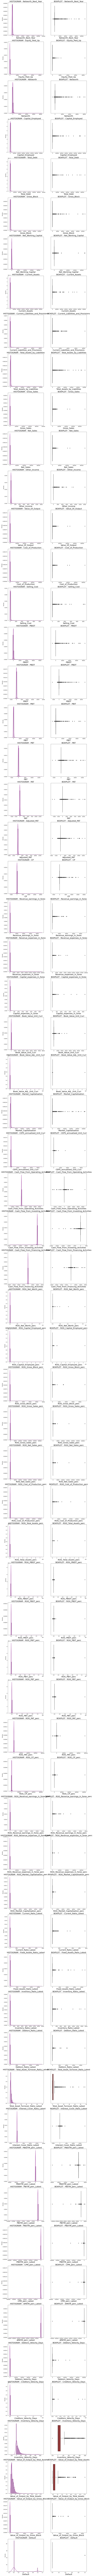

In [189]:
col_names = list(df.columns)
col_names.remove('Co_Code')
col_names.remove('Co_Name')

fig, axs=plt.subplots(nrows= 66, ncols= 2, squeeze=True, figsize=(15,500))

for i, col_val in enumerate(col_names):
    
    # HISTOGRAM
    sns.distplot(df[col_val], kde=True, bins=50, hist_kws=dict(ec='black'), ax=axs[i][0], color='purple')
    axs[i][0].set_title('HISTOGRAM - {}'.format(col_val), fontsize=20)
    axs[i][0].set_xlabel(col_val, fontsize=20)
    
    # BOXPLOT
    sns.boxplot(df[col_val], ax=axs[i][1], color='brown')
    axs[i][1].set_title('BOXPLOT - {}'.format(col_val), fontsize=20)
    axs[i][1].set_xlabel(col_val, fontsize=20)
    
plt.show()

#### It is observed that all the variables have Ouliers. Also, from Histogram it is seen that all the variables are highly skewed, right or left.

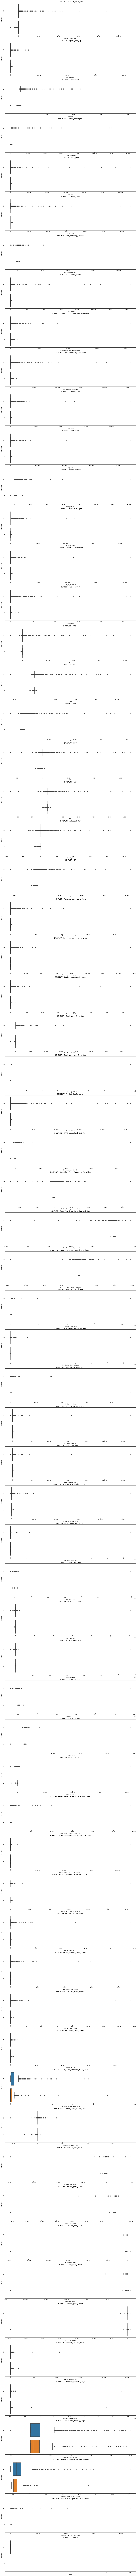

In [190]:
col_names = list(df.columns)
col_names.remove('Co_Code')
col_names.remove('Co_Name')
fig, ax = plt.subplots(nrows= 66, figsize=(20,400))
i = 0
for i, col_val in enumerate(col_names):
    
    # BOXPLOT
    
    sns.boxplot(x = df[col_val], y = df["Default"] , ax=ax[i], orient='h')

    ax[i].set_title('BOXPLOT - {}'.format(col_val), fontsize=14)
    ax[i].set_ylabel("Default", fontsize=14)


plt.show()

In [191]:
df.skew()

Co_Code                                 1.604115
Networth_Next_Year                     13.041264
Equity_Paid_Up                         45.928921
Networth                               11.738799
Capital_Employed                       18.073683
Total_Debt                             19.417622
Gross_Block                            18.528589
Net_Working_Capital                    30.580553
Current_Assets                         20.779473
Current_Liabilities_and_Provisions     15.291405
Total_Assets_by_Liabilities            13.367863
Gross_Sales                            31.560200
Net_Sales                              31.085039
Other_Income                           18.805640
Value_Of_Output                        30.812223
Cost_of_Production                     34.588562
Selling_Cost                           18.879055
PBIDT                                  13.179047
PBDT                                   13.555030
PBIT                                   14.009481
PBT                 

In [192]:
df.mean()

Co_Code                                16065.388734
Networth_Next_Year                       725.045251
Equity_Paid_Up                            62.966584
Networth                                 649.746299
Capital_Employed                        2799.611054
Total_Debt                              1994.823779
Gross_Block                              594.178829
Net_Working_Capital                      410.809665
Current_Assets                          1960.349172
Current_Liabilities_and_Provisions       391.992078
Total_Assets_by_Liabilities             1778.453751
Gross_Sales                             1123.738985
Net_Sales                               1079.702579
Other_Income                              48.729824
Value_Of_Output                         1077.187292
Cost_of_Production                       798.544621
Selling_Cost                              25.554997
PBIDT                                    248.175282
PBDT                                     116.268795
PBIT        

## Bivariate analysis

In [193]:
df.corr()

Co_Code  Networth_Next_Year  \
Co_Code                              1.000000           -0.052519   
Networth_Next_Year                  -0.052519            1.000000   
Equity_Paid_Up                      -0.005923            0.364376   
Networth                            -0.056693            0.971500   
Capital_Employed                    -0.042042            0.594155   
Total_Debt                          -0.036870            0.480513   
Gross_Block                         -0.043245            0.742405   
Net_Working_Capital                 -0.019953            0.240580   
Current_Assets                      -0.038191            0.481718   
Current_Liabilities_and_Provisions  -0.056355            0.777579   
Total_Assets_by_Liabilities         -0.050236            0.821037   
Gross_Sales                         -0.041289            0.593493   
Net_Sales                           -0.041391            0.600618   
Other_Income                        -0.047035            0.678346   
Value_Of_Output                     -0.041720            0.605301   
Cost_of_Production                  -0.033688            0.497055   
Selling_Cost                        -0.062795            0.364037   
PBIDT                               -0.052736            0.760070   
PBDT                                -0.048206            0.860290   
PBIT                                -0.050186            0.704101   
PBT                                 -0.045221            0.805141   
PAT                                 -0.041432            0.787905   
Adjusted_PAT                        -0.041221            0.777510   
CP                                  -0.045622            0.854636   
Revenue_earnings_in_forex           -0.040652            0.436856   
Revenue_expenses_in_forex           -0.027315            0.395118   
Capital_expenses_in_forex           -0.022548            0.572393   
Book_Value_Unit_Curr                 0.050388            0.026351   
Book_Value_Adj._Unit_Curr           -0.013365            0.004253   
Market_Capitalisation               -0.057611            0.703192   
CEPS_annualised_Unit_Curr            0.038102            0.011149   
Cash_Flow_From_Operating_Activities -0.014786            0.344339   
Cash_Flow_From_Investing_Activities  0.012111           -0.562411   
Cash_Flow_From_Financing_Activities  0.007039           -0.015127   
ROG_Net_Worth_perc                   0.064757            0.003461   
ROG_Capital_Employed_perc            0.053742            0.004571   
ROG_Gross_Block_perc                 0.009248           -0.003156   
ROG_Gross_Sales_perc                 0.042460           -0.005366   
ROG_Net_Sales_perc                   0.042469           -0.005362   
ROG_Cost_of_Production_perc          0.064517           -0.007222   
ROG_Total_Assets_perc                0.051877            0.004759   
ROG_PBIDT_perc                       0.025952           -0.001490   
ROG_PBDT_perc                        0.027450           -0.001497   
ROG_PBIT_perc                        0.027373           -0.001515   
ROG_PBT_perc                         0.028578           -0.000705   
ROG_PAT_perc                         0.025146           -0.000199   
ROG_CP_perc                          0.028765           -0.001373   
ROG_Revenue_earnings_in_forex_perc  -0.012250            0.020682   
ROG_Revenue_expenses_in_forex_perc  -0.001344           -0.001876   
ROG_Market_Capitalisation_perc      -0.024809           -0.003039   
Current_Ratio_Latest                 0.035363           -0.014300   
Fixed_Assets_Ratio_Latest            0.043518           -0.009200   
Inventory_Ratio_Latest               0.004780            0.189692   
Debtors_Ratio_Latest                -0.005284           -0.002456   
Total_Asset_Turnover_Ratio_Latest    0.062597           -0.028608   
Interest_Cover_Ratio_Latest          0.007731            0.033619   
PBIDTM_perc_Latest                   0.002949            0.005635   
PBITM_perc_Latest                   

### Selecting important variables

#### Profitability ratios, Liquidity and Leverage ratios are important variables. The new dataframe cp_2 is a collection of such important variables fetched from the source dataframe

In [194]:
df1=df[['Networth_Next_Year','PBIDT','PBDT','PBIT','PBT','PAT','Adjusted_PAT','ROG_Total_Assets_perc',
         'Current_Ratio_Latest','Fixed_Assets_Ratio_Latest','Inventory_Ratio_Latest','Debtors_Ratio_Latest',
         'Total_Asset_Turnover_Ratio_Latest','Interest_Cover_Ratio_Latest']]

In [195]:
df1.corr()

Networth_Next_Year     PBIDT      PBDT  \
Networth_Next_Year                           1.000000  0.760070  0.860290   
PBIDT                                        0.760070  1.000000  0.767398   
PBDT                                         0.860290  0.767398  1.000000   
PBIT                                         0.704101  0.993365  0.714482   
PBT                                          0.805141  0.778678  0.978305   
PAT                                          0.787905  0.744135  0.967552   
Adjusted_PAT                                 0.777510  0.754622  0.953854   
ROG_Total_Assets_perc                        0.004759 -0.002854 -0.003111   
Current_Ratio_Latest                        -0.014300 -0.012782 -0.011764   
Fixed_Assets_Ratio_Latest                   -0.009200 -0.008797 -0.008014   
Inventory_Ratio_Latest                       0.189692  0.098002  0.196340   
Debtors_Ratio_Latest                        -0.002456 -0.004539 -0.001499   
Total_Asset_Turnover_Ratio_Latest           -0.028608 -0.031744 -0.012063   
Interest_Cover_Ratio_Latest                  0.033619  0.025139  0.057929   

                                       PBIT       PBT       PAT  Adjusted_PAT  \
Networth_Next_Year                 0.704101  0.805141  0.787905      0.777510   
PBIDT                              0.993365  0.778678  0.744135      0.754622   
PBDT                               0.714482  0.978305  0.967552      0.953854   
PBIT                               1.000000  0.746946  0.710947      0.725237   
PBT                                0.746946  1.000000  0.988037      0.979170   
PAT                                0.710947  0.988037  1.000000      0.984331   
Adjusted_PAT                       0.725237  0.979170  0.984331      1.000000   
ROG_Total_Assets_perc             -0.002670 -0.002942 -0.002919     -0.003091   
Current_Ratio_Latest              -0.011778 -0.010163 -0.009272     -0.009717   
Fixed_Assets_Ratio_Latest         -0.008070 -0.006812 -0.006109     -0.006728   
Inventory_Ratio_Latest             0.068251  0.153773  0.165479      0.145394   
Debtors_Ratio_Latest              -0.004354 -0.000806 -0.000083     -0.000218   
Total_Asset_Turnover_Ratio_Latest -0.032553 -0.012379 -0.012298     -0.014059   
Interest_Cover_Ratio_Latest        0.024992  0.065806  0.072445      0.077047   

                                   ROG_Total_Assets_perc  \
Networth_Next_Year                              0.004759   
PBIDT                                          -0.002854   
PBDT                                           -0.003111   
PBIT                                           -0.002670   
PBT                                            -0.002942   
PAT                                            -0.002919   
Adjusted_PAT                                   -0.003091   
ROG_Total_Assets_perc                           1.000000   
Current_Ratio_Latest                           -0.002218   
Fixed_Assets_Ratio_Latest                       0.024998   
Inventory_Ratio_Latest                          0.004424   
Debtors_Ratio_Latest                           -0.001128   
Total_Asset_Turnover_Ratio_Latest              -0.007970   
Interest_Cover_Ratio_Latest                    -0.000993   

                                   Current_Ratio_Latest  \
Networth_Next_Year                            -0.014300   
PBIDT                                         -0.012782   
PBDT                                          -0.011764   
PBIT                                          -0.011778   
PBT                                           -0.010163   
PAT                                           -0.009272   
Adjusted_PAT                                  -0.009717   
ROG_Total_Assets_perc                         -0.002218   
Current_Ratio_Latest                           1.000000   
Fixed_Assets_Ratio_Latest                      0.001783   
Inventory_Ratio_Latest                        -0.006896   
Debtors_Ratio_Latest                          -0.00542

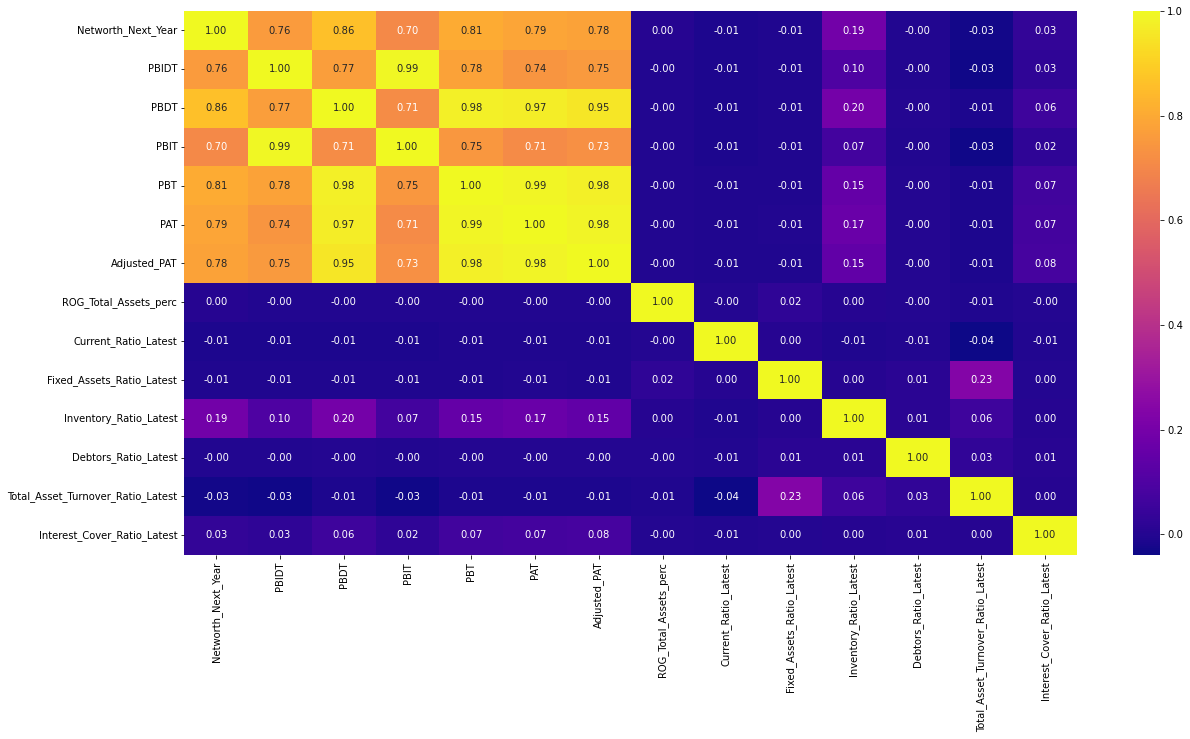

In [196]:
plt.subplots(figsize = (20,10))
sns.heatmap(df1.corr(), annot = True, cmap = 'plasma', fmt = '.2f');

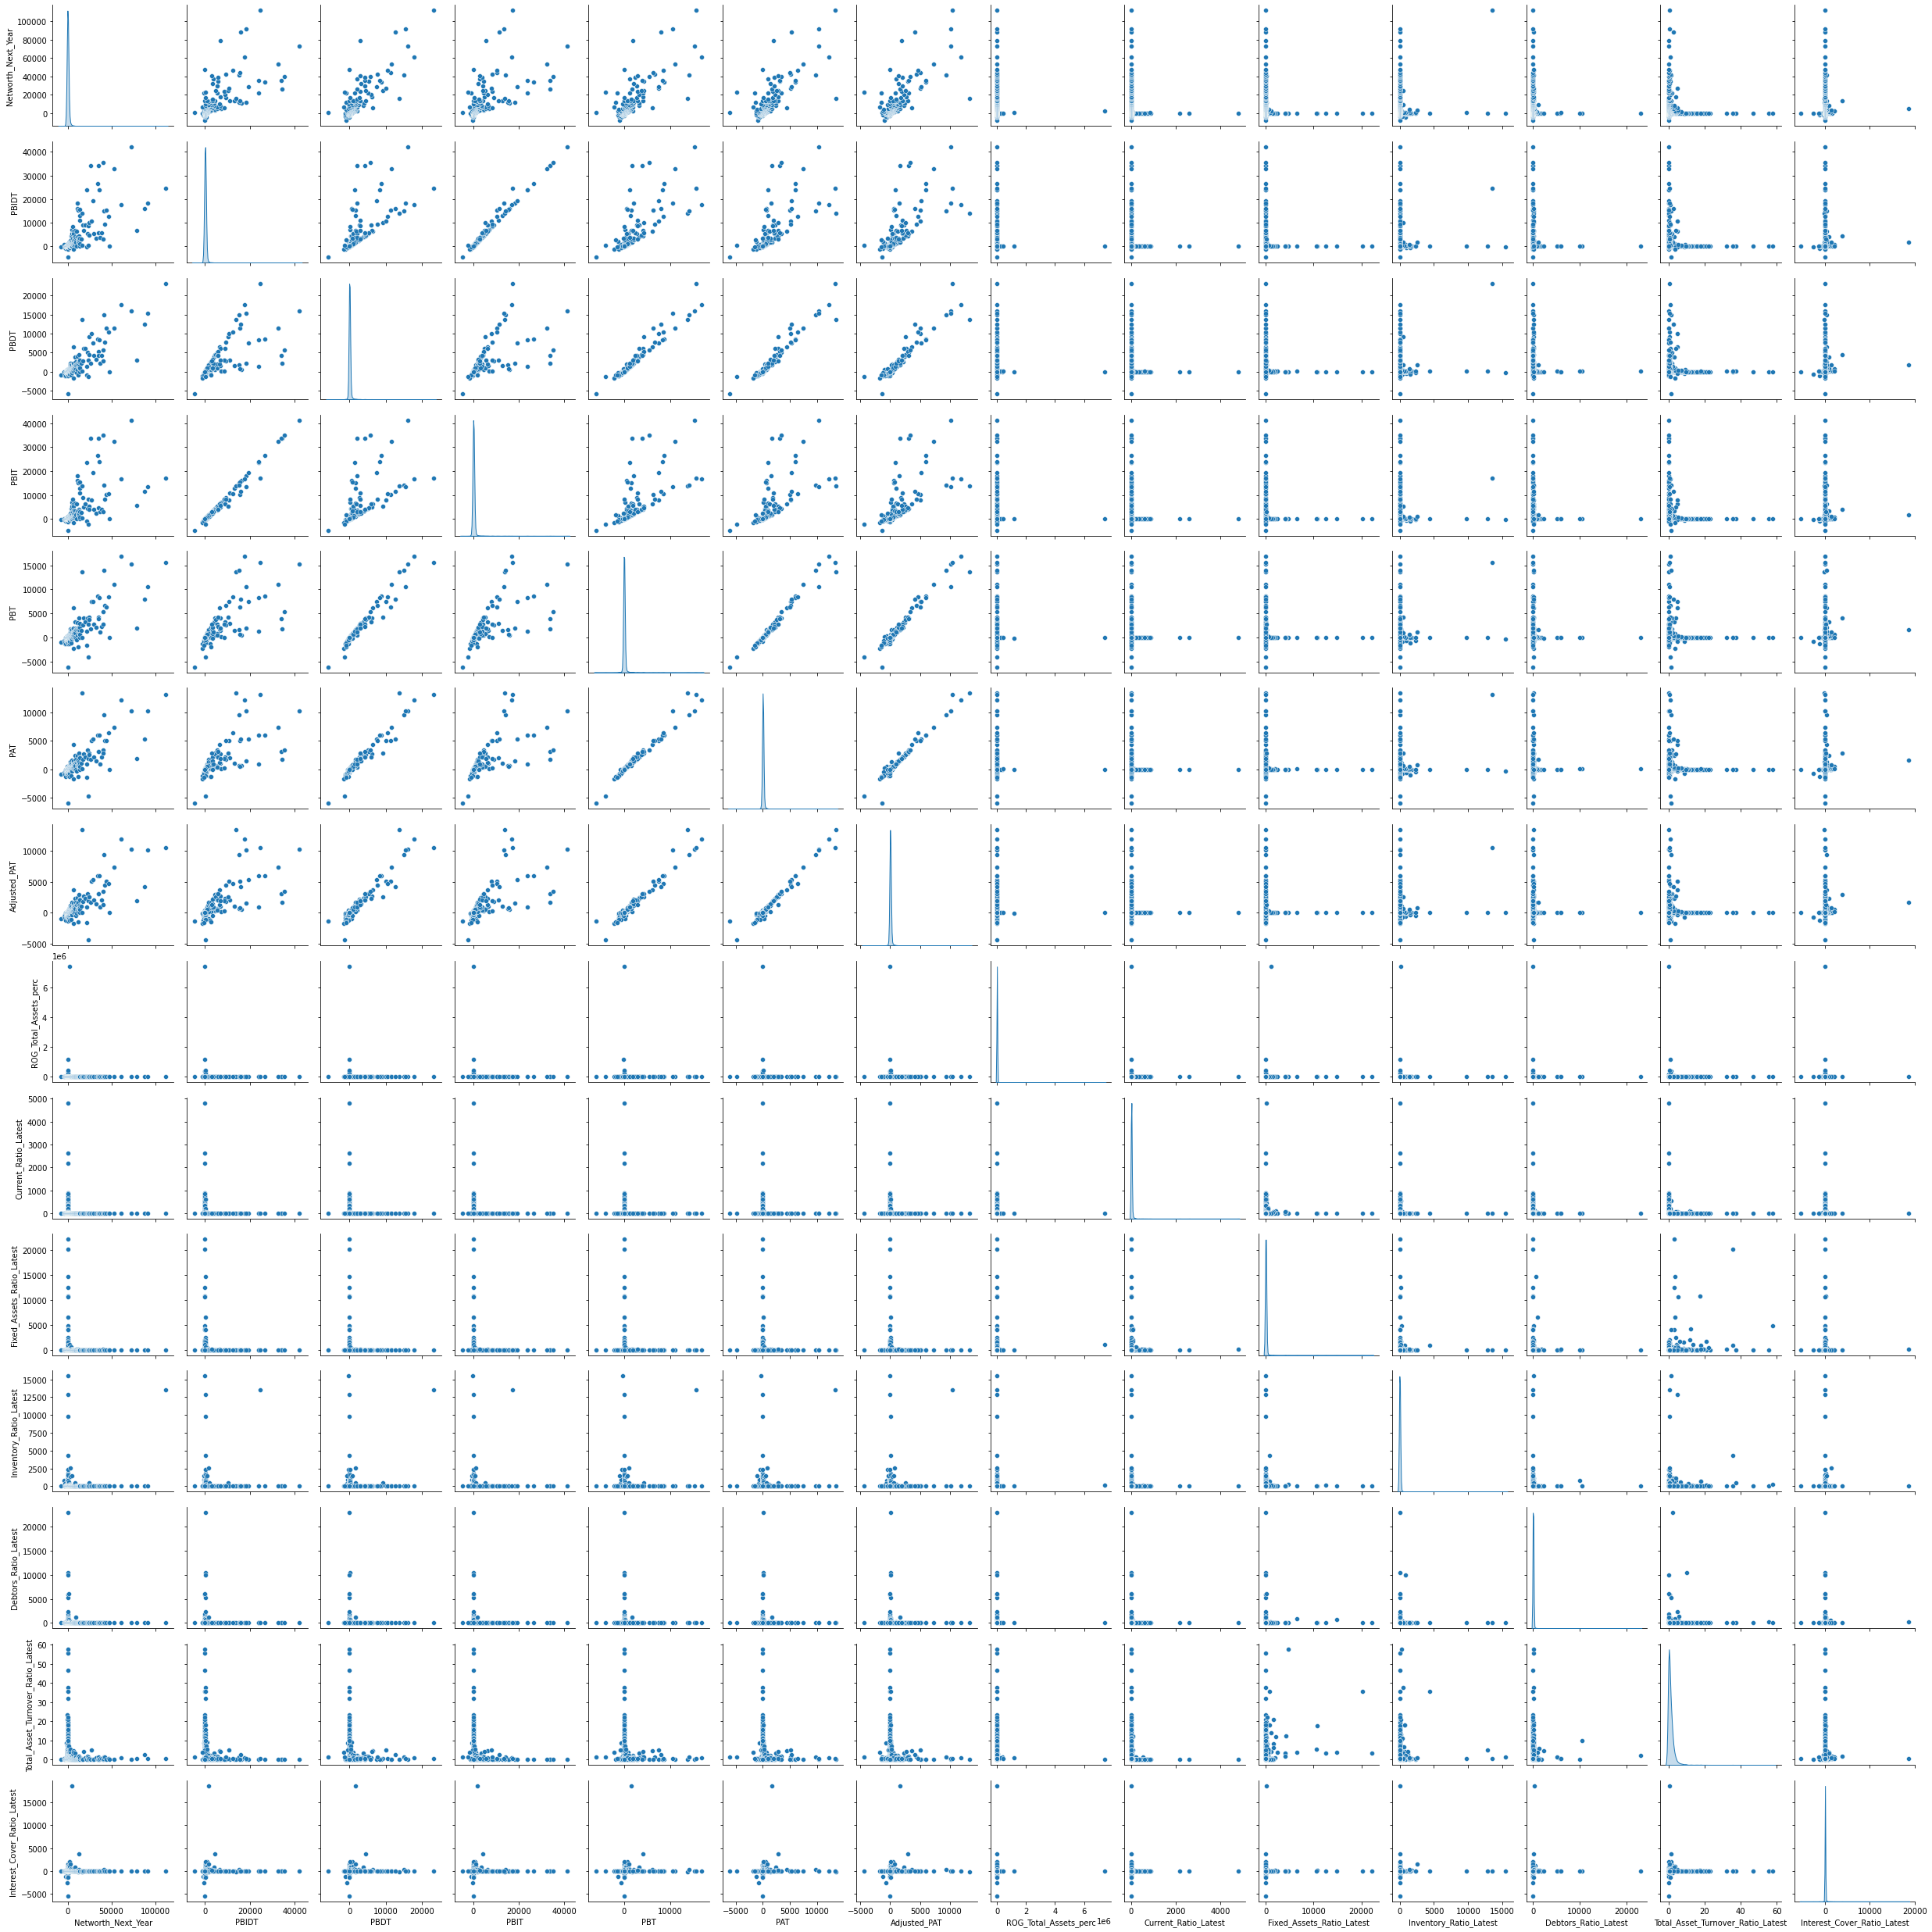

In [197]:
sns.pairplot(df1,diag_kind = 'kde')

In [198]:
df_temp = df[['Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_perc', 'ROG_CP_perc', 'ROG_Revenue_earnings_in_forex_perc',
       'ROG_Revenue_expenses_in_forex_perc', 'ROG_Market_Capitalisation_perc',
       'Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest',
       'Inventory_Ratio_Latest', 'Debtors_Ratio_Latest',
       'Total_Asset_Turnover_Ratio_Latest', 'Interest_Cover_Ratio_Latest',
       'PBIDTM_perc_Latest', 'PBITM_perc_Latest', 'PBDTM_perc_Latest',
       'CPM_perc_Latest', 'APATM_perc_Latest', 'Debtors_Velocity_Days',
       'Creditors_Velocity_Days', 'Inventory_Velocity_Days',
       'Value_of_Output_by_Total_Assets', 'Value_of_Output_by_Gross_Block']]

<AxesSubplot:>

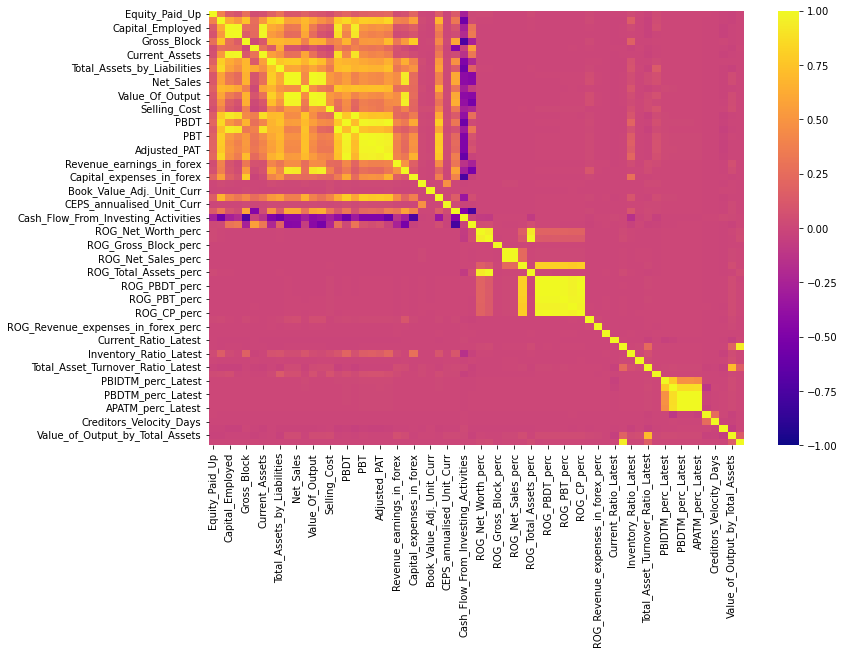

In [199]:
plt.figure(figsize = (12,8))
cor_matrix = df_temp.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [200]:
df_temp_1 = df[['Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities']]

<AxesSubplot:>

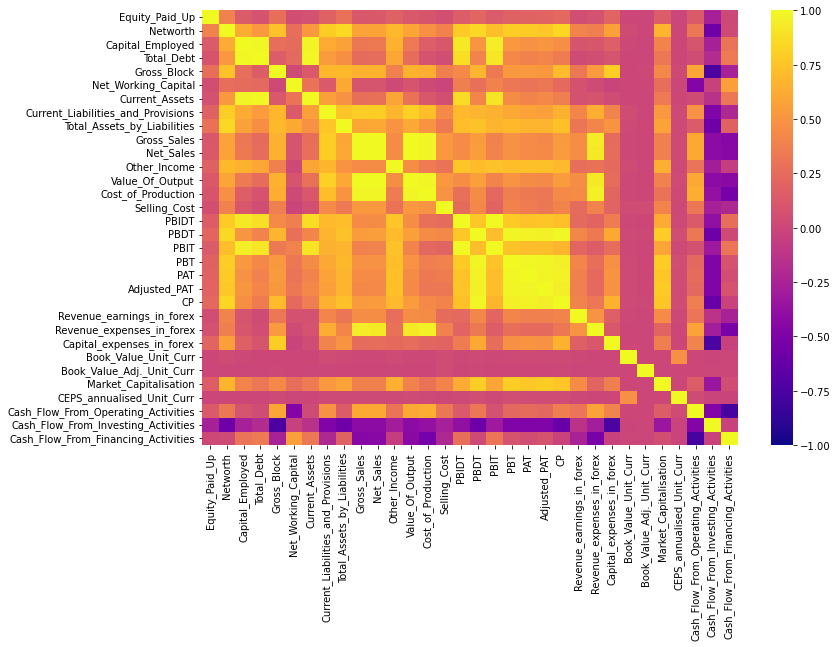

In [201]:
plt.figure(figsize = (12,8))
cor_matrix_1 = df_temp_1.corr()
sns.heatmap(cor_matrix_1, cmap = 'plasma', vmin = -1, vmax= 1)

In [202]:
df_temp_2 = df[['ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_perc', 'ROG_CP_perc']]

<AxesSubplot:>

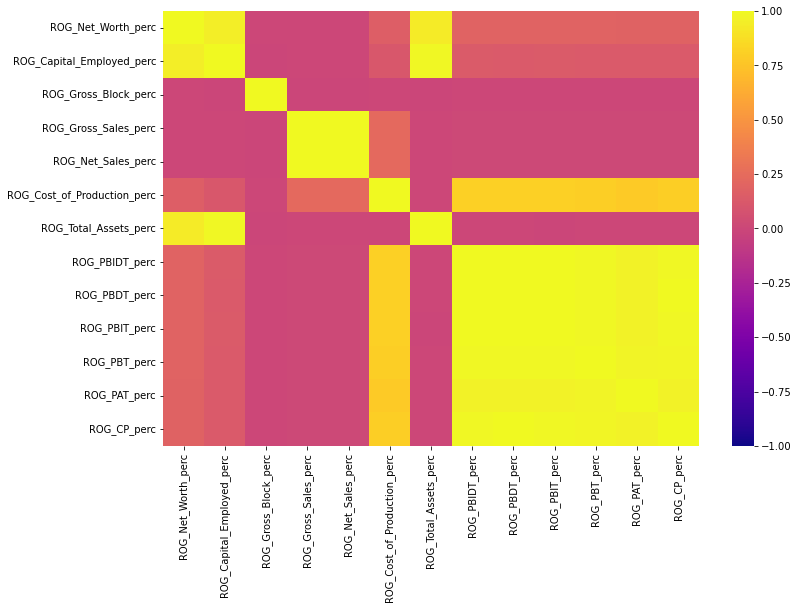

In [203]:
plt.figure(figsize = (12,8))
cor_matrix_2 = df_temp_2.corr()
sns.heatmap(cor_matrix_2, cmap = 'plasma',  vmin = -1, vmax= 1)

In [204]:
df_temp_3 = df[['Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest',
'Inventory_Ratio_Latest', 'Debtors_Ratio_Latest',
'Total_Asset_Turnover_Ratio_Latest', 'Interest_Cover_Ratio_Latest',
'PBIDTM_perc_Latest', 'PBITM_perc_Latest', 'PBDTM_perc_Latest',
'CPM_perc_Latest', 'APATM_perc_Latest', 'Debtors_Velocity_Days',
'Creditors_Velocity_Days', 'Inventory_Velocity_Days',
'Value_of_Output_by_Total_Assets', 'Value_of_Output_by_Gross_Block']]

<AxesSubplot:>

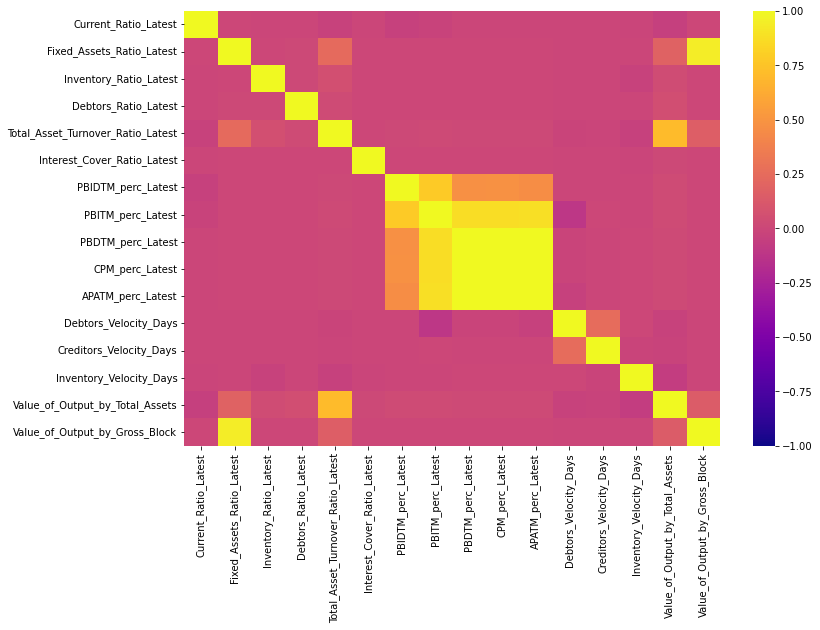

In [205]:
plt.figure(figsize = (12,8))
cor_matrix_3 = df_temp_3.corr()
sns.heatmap(cor_matrix_3, cmap = 'plasma',  vmin = -1, vmax= 1)

<AxesSubplot:>

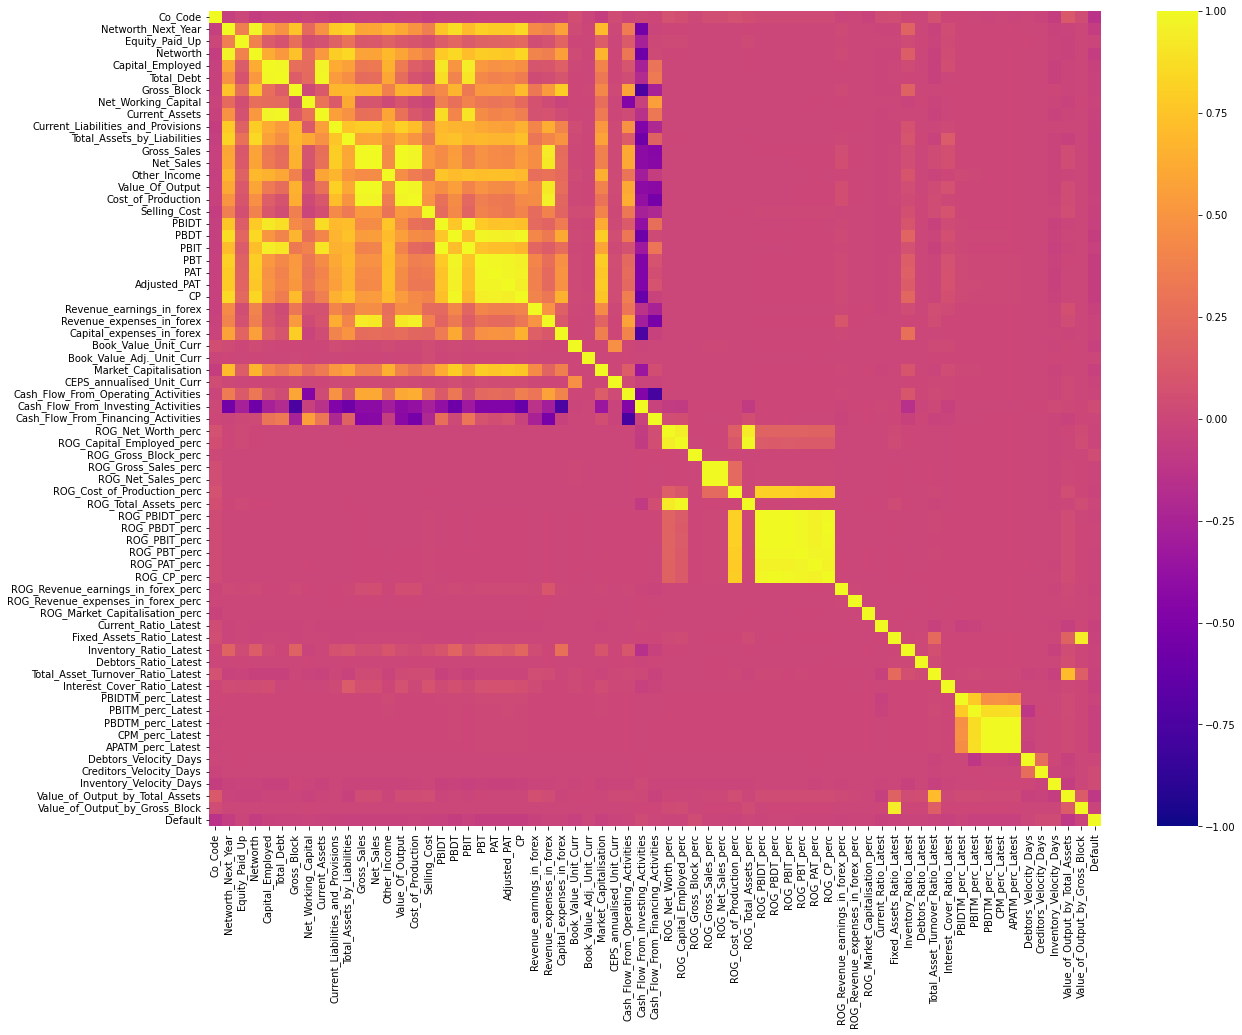

In [206]:
plt.figure(figsize = (20,15))
cor_matrix_4 = df.corr()
sns.heatmap(cor_matrix_4, cmap = 'plasma',  vmin = -1, vmax= 1)

### Missing values treatment with median

In [207]:
#Columns with missing values
print(np.where(df.isnull().sum()>0))

(array([29, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64], dtype=int64),)


In [208]:
cols_missing=df.isnull().sum()[df.isnull().sum()>0].index
cols_missing

Index(['Book_Value_Adj._Unit_Curr', 'Current_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest',
       'PBITM_perc_Latest', 'PBDTM_perc_Latest', 'CPM_perc_Latest',
       'APATM_perc_Latest', 'Inventory_Velocity_Days'],
      dtype='object')

In [209]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(df[cols_missing].iloc[:,:])

df[cols_missing]=imputer.transform(df[cols_missing])

In [210]:
df.isnull().sum()

Co_Code                                0
Co_Name                                0
Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Current_Assets                         0
Current_Liabilities_and_Provisions     0
Total_Assets_by_Liabilities            0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Production                     0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP              

In [211]:
df[['Book_Value_Adj._Unit_Curr', 'Current_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest',
       'PBITM_perc_Latest', 'PBDTM_perc_Latest', 'CPM_perc_Latest',
       'APATM_perc_Latest', 'Inventory_Velocity_Days']].isnull().sum()

Book_Value_Adj._Unit_Curr            0
Current_Ratio_Latest                 0
Fixed_Assets_Ratio_Latest            0
Inventory_Ratio_Latest               0
Debtors_Ratio_Latest                 0
Total_Asset_Turnover_Ratio_Latest    0
Interest_Cover_Ratio_Latest          0
PBIDTM_perc_Latest                   0
PBITM_perc_Latest                    0
PBDTM_perc_Latest                    0
CPM_perc_Latest                      0
APATM_perc_Latest                    0
Inventory_Velocity_Days              0
dtype: int64

# FRA Milestone - 2

In [212]:
#Load the required packages
import numpy as np 
import pandas as pd 
#Plot styling
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import scipy.cluster.hierarchy as sch 
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats

In [213]:
df.isnull().sum()

Co_Code                                0
Co_Name                                0
Networth_Next_Year                     0
Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Current_Assets                         0
Current_Liabilities_and_Provisions     0
Total_Assets_by_Liabilities            0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Production                     0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP              

In [214]:
df.isna().sum().sum()

0

### Outlier Analysis

In [215]:
#outlier analysis

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
med = df.median()
IQR = q3 - q1

#checking extreme outliers (3x)
upper_limit = q3 + (3 * IQR)   
lower_limit = q1 - (3 * IQR)

### What percent of values in each column are outliers

In [216]:
((df > upper_limit).sum()/len(df)*100).sort_values(ascending=False)

ROG_Revenue_expenses_in_forex_perc     22.894590
Capital_expenses_in_forex              19.353040
ROG_Revenue_earnings_in_forex_perc     17.875070
Revenue_earnings_in_forex              17.707752
Revenue_expenses_in_forex              16.731735
PAT                                    14.863358
Market_Capitalisation                  14.723926
PBT                                    14.668154
Adjusted_PAT                           14.612381
CP                                     14.333519
PBDT                                   14.054657
PBIT                                   13.664250
PBIDT                                  13.664250
Other_Income                           13.245956
Selling_Cost                           13.162298
Cash_Flow_From_Operating_Activities    13.050753
Networth_Next_Year                     13.022867
Total_Debt                             12.939208
Networth                               12.548801
Capital_Employed                       12.548801
Current_Ratio_Latest

In [217]:
((df < lower_limit).sum()/len(df)*100).sort_values(ascending=False)

ROG_Revenue_expenses_in_forex_perc     22.141662
ROG_Revenue_earnings_in_forex_perc     18.851088
Cash_Flow_From_Investing_Activities    14.807585
Cash_Flow_From_Financing_Activities    13.720022
APATM_perc_Latest                      11.293921
CPM_perc_Latest                         8.198550
PBDTM_perc_Latest                       7.585053
PBITM_perc_Latest                       7.166760
ROG_Gross_Block_perc                    7.138873
Adjusted_PAT                            6.776352
PAT                                     6.636921
ROG_Net_Worth_perc                      6.497490
ROG_PBT_perc                            6.107083
PBT                                     6.051311
ROG_PAT_perc                            5.856107
ROG_CP_perc                             5.605131
ROG_PBDT_perc                           5.493586
PBIDTM_perc_Latest                      5.103179
ROG_PBIT_perc                           4.684886
ROG_PBIDT_perc                          4.294479
Interest_Cover_Ratio

In [218]:
(((df>upper_limit).sum()+(df<lower_limit).sum())/len(df)*100).sort_values(ascending=False)

ROG_Revenue_expenses_in_forex_perc     45.036252
ROG_Revenue_earnings_in_forex_perc     36.726157
Cash_Flow_From_Financing_Activities    21.695482
PAT                                    21.500279
Adjusted_PAT                           21.388734
PBT                                    20.719465
Cash_Flow_From_Investing_Activities    19.492471
Capital_expenses_in_forex              19.353040
APATM_perc_Latest                      18.460680
CP                                     17.958728
PBDT                                   17.819297
Revenue_earnings_in_forex              17.707752
Revenue_expenses_in_forex              16.731735
Cash_Flow_From_Operating_Activities    16.592303
ROG_Gross_Block_perc                   16.174010
PBIT                                   15.783603
Interest_Cover_Ratio_Latest            15.142220
PBIDT                                  15.058561
Market_Capitalisation                  14.723926
Networth_Next_Year                     14.194088
ROG_Net_Worth_perc  

Since there are a significant number of records which are outliers, it will change the essence of the data, if we treat outliers. Also the outliers are present due to the nature of the data which comprises small as well as big companies, hence the disparity

### Heatmap

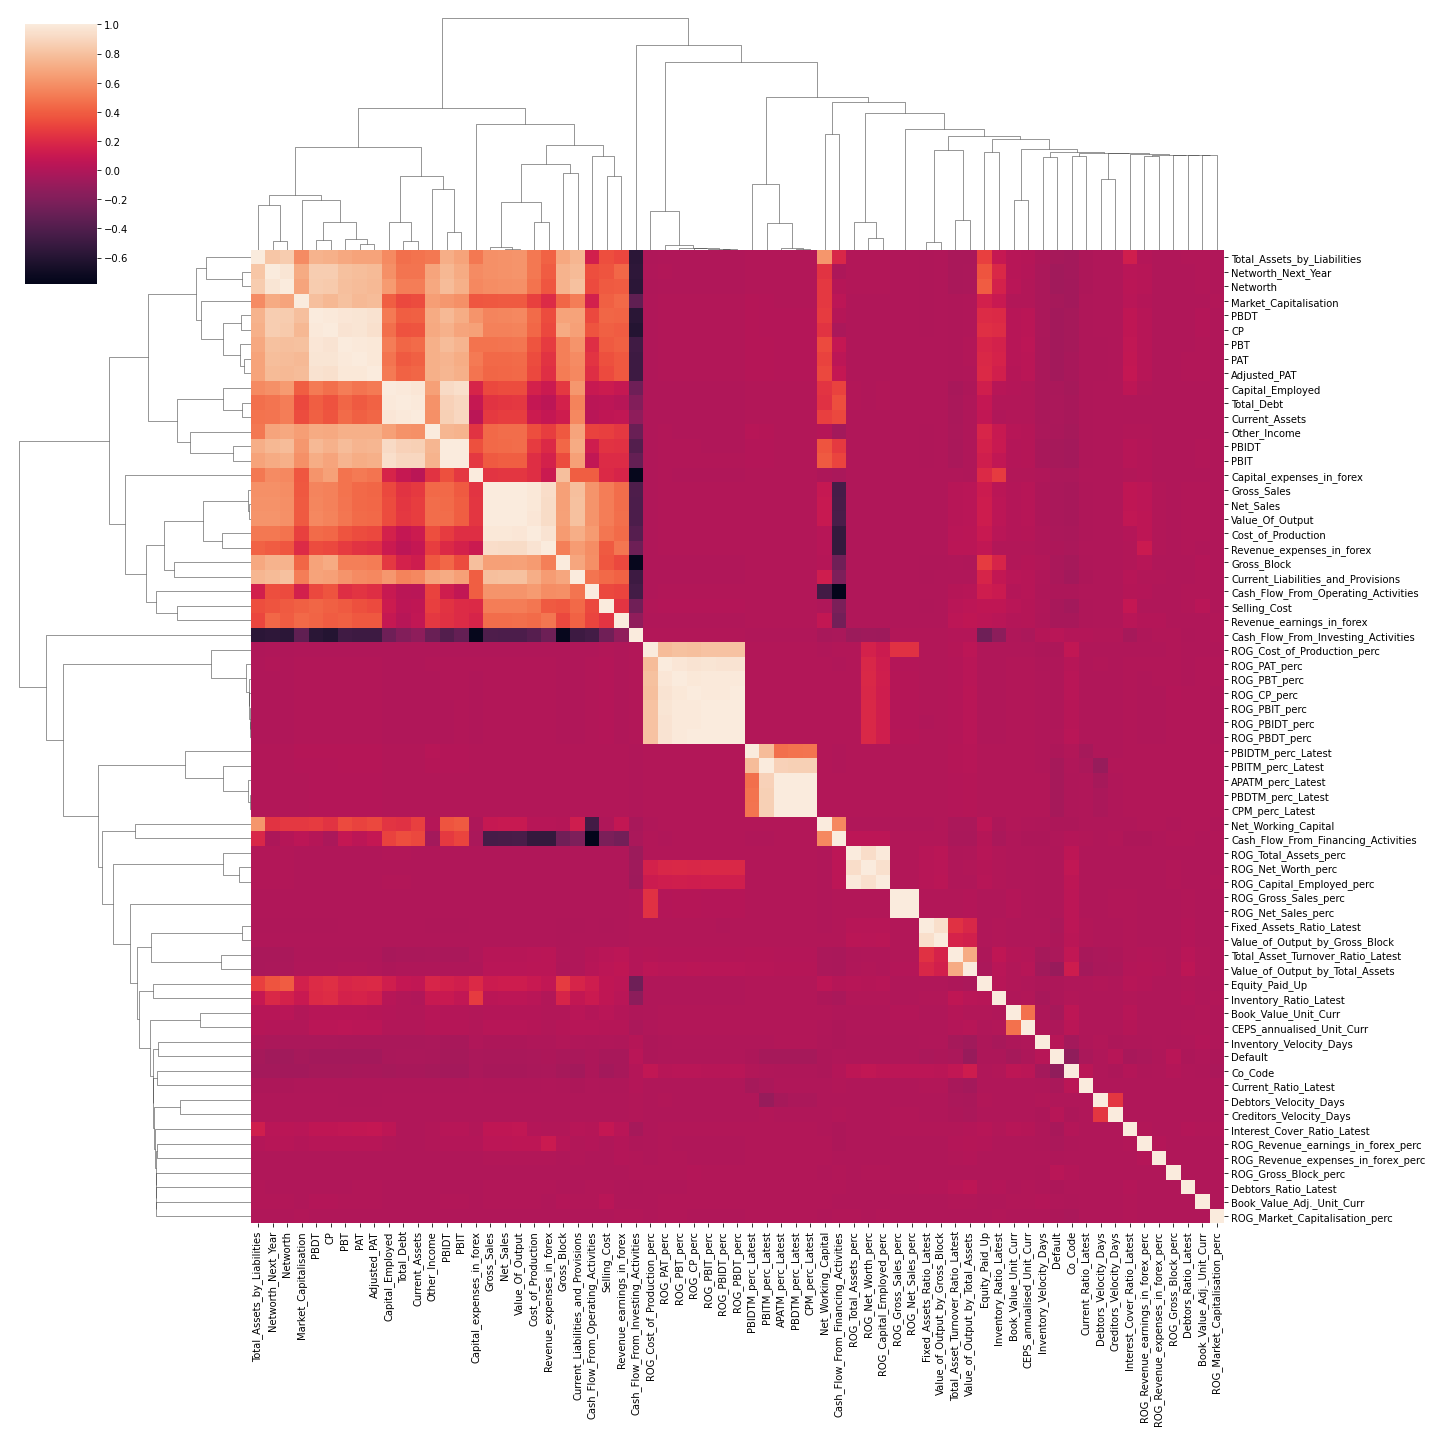

In [219]:
sns.clustermap(df.corr(),figsize=(20,20))

#### Analysing Networth_Next_Year variable, since on the basis of this variable we will define the dependent variable

In [220]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
     

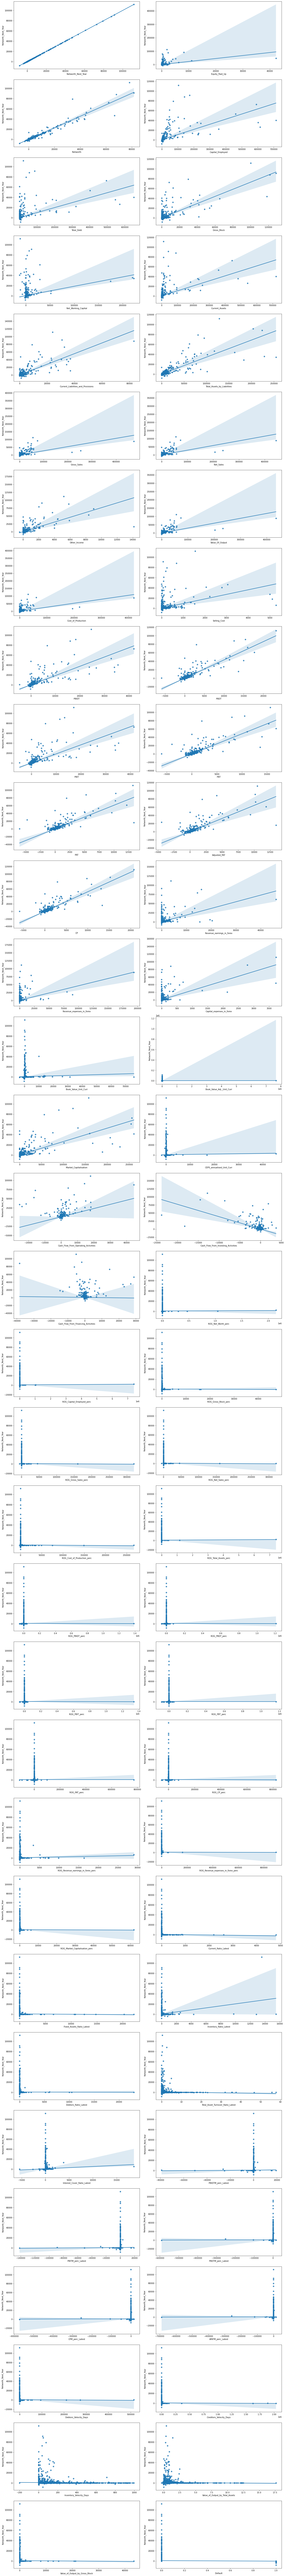

In [221]:
fig, ax = plt.subplots(figsize = (20, 180), nrows = 33, ncols = 2)
cols = list(df.columns)
cols.remove('Co_Code')
cols.remove('Co_Name')
for i, col in enumerate(cols):
    sns.regplot(x = df[col], y = df['Networth_Next_Year'], ax = ax[i//2, i%2])
    
plt.tight_layout(pad = 1.1)

### Making the dependent Variable

In [222]:
df['Default']=np.where(df['Networth_Next_Year']<0,1,0)

In [223]:
df.head()

Co_Code          Co_Name  Networth_Next_Year  Equity_Paid_Up  Networth  \
0    16974      Hind.Cables            -8021.60          419.36  -7027.48   
1    21214  Tata Tele. Mah.            -3986.19         1954.93  -2968.08   
2    14852     ABG Shipyard            -3192.58           53.84    506.86   
3     2439              GTL            -3054.51          157.30   -623.49   
4    23505  Bharati Defence            -2967.36           50.30  -1070.83   

   Capital_Employed  Total_Debt  Gross_Block  Net_Working_Capital  \
0          -1007.24     5936.03       474.30             -1076.34   
1           4458.20     7410.18      9070.86             -1098.88   
2           7714.68     6944.54      1281.54              4496.25   
3           2353.88     2326.05      1033.69             -2612.42   
4           4675.33     5740.90      1084.20              1836.23   

   Current_Assets  Current_Liabilities_and_Provisions  \
0           40.50                             1116.85   
1          486.86                             1585.74   
2         9097.64                             4601.39   
3         1034.12                             3646.54   
4         4685.81                             2849.58   

   Total_Assets_by_Liabilities  Gross_Sales  Net_Sales  Other_Income  \
0                       109.60         0.00       0.00          7.60   
1                      6043.94      2892.73    2892.73         46.27   
2                     12316.07       392.13     392.13          9.55   
3                      6000.42      1354.39    1354.39        223.85   
4                      7524.91        38.72      38.72          9.82   

   Value_Of_Output  Cost_of_Production  Selling_Cost   PBIDT     PBDT    PBIT  \
0            -0.07              137.67          0.00 -179.06  -926.52 -185.53   
1          2900.71             2572.46         40.51  646.46    -4.32   35.53   
2           301.16              408.51         54.83 -281.92 -1086.71 -381.10   
3          1350.14             1326.99          3.34 -213.01  -677.57 -336.73   
4            38.72              186.29          1.97 -647.86  -944.42 -710.13   

       PBT     PAT  Adjusted_PAT      CP  Revenue_earnings_in_forex  \
0  -932.99 -932.99       -937.85 -926.52                       0.00   
1  -615.25 -615.25       -617.14   -4.32                       6.35   
2 -1185.89 -897.70       -873.39 -798.52                       0.00   
3  -801.29 -801.29       -770.18 -677.57                       0.89   
4 -1006.69 -864.58       -327.77 -802.31                       0.00   

   Revenue_expenses_in_forex  Capital_expenses_in_forex  Book_Value_Unit_Curr  \
0                       0.00                       0.00               -167.58   
1                     143.42                     141.17                -15.18   
2                      86.36                       2.27                 94.14   
3                      28.88                       0.00                -39.64   
4                      15.62                       0.00               -212.89   

   Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
0                    -167.58                   0.00   
1                     -15.18                1544.39   
2                      94.14                1220.81   
3                     -39.64                 194.27   
4                    -212.89                 113.68   

   CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
0                     -22.09                              -102.47   
1                      -0.02                               635.91   
2                    -148.31                              -873.40   
3                     -43.08                               324.47   
4                    -159.50                              -191.54   

   Cash_Flow_From_Investing_Activities  Cash_Flow_From_Financing_Activities  \
0                                 1.46                                92.58   
1                              -785.00      

In [224]:
X = df.drop('Default', axis = 1)
y = df['Default']

In [225]:
X.shape

(3586, 67)

In [226]:
y.shape

(3586,)

### Feature Selection

Since there are too many columns, we need to determine the columns which are related and eliminate them if possible. We will use VIF to determine the collinearity and eliminate using a threshold of 5.

In [227]:
#vif calculation

def calculate_vif_(X, thresh = 5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True
    
    
    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [228]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [229]:
X=calculate_vif_(X.iloc[:,2:],5)

dropping 'PBIDT' at index: 16
dropping 'PBDT' at index: 16
dropping 'APATM_perc_Latest' at index: 57
dropping 'ROG_Gross_Sales_perc' at index: 34
dropping 'Net_Sales' at index: 11
dropping 'PBDTM_perc_Latest' at index: 53
dropping 'Value_Of_Output' at index: 12
dropping 'ROG_Total_Assets_perc' at index: 34
dropping 'Capital_Employed' at index: 3
dropping 'Gross_Sales' at index: 9
dropping 'Total_Debt' at index: 3
dropping 'ROG_PBDT_perc' at index: 32
dropping 'ROG_PBIT_perc' at index: 32
dropping 'CP' at index: 15
dropping 'PAT' at index: 13
dropping 'ROG_PBIDT_perc' at index: 29
dropping 'Total_Assets_by_Liabilities' at index: 7
dropping 'ROG_PBT_perc' at index: 28
dropping 'PBT' at index: 11
dropping 'PBIT' at index: 10
dropping 'Cost_of_Production' at index: 8
dropping 'Networth' at index: 2
dropping 'PBITM_perc_Latest' at index: 36
dropping 'ROG_CP_perc' at index: 25
dropping 'Cash_Flow_From_Financing_Activities' at index: 18
dropping 'ROG_Net_Worth_perc' at index: 18
dropping 'Gro

In [230]:
X

Equity_Paid_Up  Net_Working_Capital  Current_Assets  Other_Income  \
0             419.36             -1076.34           40.50          7.60   
1            1954.93             -1098.88          486.86         46.27   
2              53.84              4496.25         9097.64          9.55   
3             157.30             -2612.42         1034.12        223.85   
4              50.30              1836.23         4685.81          9.82   
...              ...                  ...             ...           ...   
3581          501.30                 0.00       444633.50       8996.35   
3582          296.50              2503.86        11554.45       2008.86   
3583         2427.95              6376.84        89609.82       5815.66   
3584         8245.46             11449.79        42353.59       2399.39   
3585         1998.70            -12145.30        11947.10       5193.00   

      Selling_Cost  Revenue_earnings_in_forex  Revenue_expenses_in_forex  \
0             0.00                       0.00                       0.00   
1            40.51                       6.35                     143.42   
2            54.83                       0.00                      86.36   
3             3.34                       0.89                      28.88   
4             1.97                       0.00                      15.62   
...            ...                        ...                        ...   
3581        187.47                       0.00                       0.00   
3582        249.20                   14429.18                   19525.06   
3583        686.53                   16009.99                  193979.73   
3584         71.22                       3.41                     962.27   
3585       1555.50                    3727.40                    3017.20   

      Capital_expenses_in_forex  Book_Value_Unit_Curr  \
0                          0.00               -167.58   
1                        141.17                -15.18   
2                          2.27                 94.14   
3                          0.00                -39.64   
4                          0.00               -212.89   
...                         ...                   ...   
3581                       0.00                247.39   
3582                      11.30                114.87   
3583                     294.88                279.95   
3584                    2788.44                 99.03   
3585                    3722.10                195.80   

      Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
0                       -167.58                   0.00   
1                        -15.18                1544.39   
2                         94.14                1220.81   
3                        -39.64                 194.27   
4                       -212.89                 113.68   
...                         ...                    ...   
3581                     247.39              256376.88   
3582                     114.87               56166.13   
3583                      69.99               89421.40   
3584                      99.03              121496.92   
3585                     195.80              157457.59   

      CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
0                        -22.09                              -102.47   
1                         -0.02                               635.91   
2                       -148.31                              -873.40   
3                        -43.08                               324.47   
4                       -159.50                              -191.54   
...                         ...                                  ...   
3581                      41.75                            -15862.27   
3582                       9.90                              4240.44   
3583                      39.03                             44529.40   
3584                      17.93                             14234.70   
3585              

In [231]:
df_new=pd.concat([X,y],axis=1)

In [232]:
df_new

Equity_Paid_Up  Net_Working_Capital  Current_Assets  Other_Income  \
0             419.36             -1076.34           40.50          7.60   
1            1954.93             -1098.88          486.86         46.27   
2              53.84              4496.25         9097.64          9.55   
3             157.30             -2612.42         1034.12        223.85   
4              50.30              1836.23         4685.81          9.82   
...              ...                  ...             ...           ...   
3581          501.30                 0.00       444633.50       8996.35   
3582          296.50              2503.86        11554.45       2008.86   
3583         2427.95              6376.84        89609.82       5815.66   
3584         8245.46             11449.79        42353.59       2399.39   
3585         1998.70            -12145.30        11947.10       5193.00   

      Selling_Cost  Revenue_earnings_in_forex  Revenue_expenses_in_forex  \
0             0.00                       0.00                       0.00   
1            40.51                       6.35                     143.42   
2            54.83                       0.00                      86.36   
3             3.34                       0.89                      28.88   
4             1.97                       0.00                      15.62   
...            ...                        ...                        ...   
3581        187.47                       0.00                       0.00   
3582        249.20                   14429.18                   19525.06   
3583        686.53                   16009.99                  193979.73   
3584         71.22                       3.41                     962.27   
3585       1555.50                    3727.40                    3017.20   

      Capital_expenses_in_forex  Book_Value_Unit_Curr  \
0                          0.00               -167.58   
1                        141.17                -15.18   
2                          2.27                 94.14   
3                          0.00                -39.64   
4                          0.00               -212.89   
...                         ...                   ...   
3581                       0.00                247.39   
3582                      11.30                114.87   
3583                     294.88                279.95   
3584                    2788.44                 99.03   
3585                    3722.10                195.80   

      Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
0                       -167.58                   0.00   
1                        -15.18                1544.39   
2                         94.14                1220.81   
3                        -39.64                 194.27   
4                       -212.89                 113.68   
...                         ...                    ...   
3581                     247.39              256376.88   
3582                     114.87               56166.13   
3583                      69.99               89421.40   
3584                      99.03              121496.92   
3585                     195.80              157457.59   

      CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
0                        -22.09                              -102.47   
1                         -0.02                               635.91   
2                       -148.31                              -873.40   
3                        -43.08                               324.47   
4                       -159.50                              -191.54   
...                         ...                                  ...   
3581                      41.75                            -15862.27   
3582                       9.90                              4240.44   
3583                      39.03                             44529.40   
3584                      17.93                             14234.70   
3585              

### Split of data based on Default Variable

<AxesSubplot:xlabel='Default', ylabel='count'>

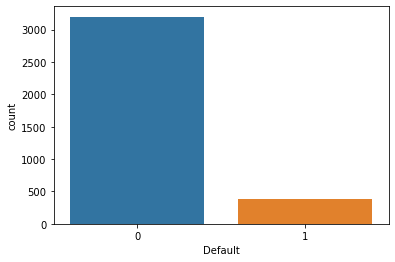

In [233]:
sns.countplot(df_new['Default'])

In [234]:
df_new['Default'].value_counts()

0    3199
1     387
Name: Default, dtype: int64

In [235]:
df_new.groupby(df['Default']).sum()

Equity_Paid_Up  Net_Working_Capital  Current_Assets  Other_Income  \
Default                                                                      
0             214372.72           1462211.17      6968271.03     171784.60   
1              11425.45             10952.29        61541.10       2960.55   

         Selling_Cost  Revenue_earnings_in_forex  Revenue_expenses_in_forex  \
Default                                                                       
0            89977.28                  464874.78                  912428.20   
1             1662.94                    5483.88                    6760.43   

         Capital_expenses_in_forex  Book_Value_Unit_Curr  \
Default                                                    
0                         27196.23             586996.27   
1                           257.07             -23141.39   

         Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
Default                                                     
0                      8085412.645             5949904.88   
1                       -50363.195               17530.42   

         CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
Default                                                                   
0                        134490.11                            235462.53   
1                         -5327.02                               391.38   

         Cash_Flow_From_Investing_Activities  ROG_Capital_Employed_perc  \
Default                                                                   
0                                 -218197.01                10743779.21   
1                                     -84.12                  -25638.99   

         ROG_Gross_Block_perc  ROG_Net_Sales_perc  \
Default                                             
0                    88508.37           861825.00   
1                    46161.37             8097.47   

         ROG_Cost_of_Production_perc  ROG_PAT_perc  \
Default                                              
0                         1094851.54     554765.70   
1                           18559.88    -152302.99   

         ROG_Revenue_earnings_in_forex_perc  \
Default                                       
0                                 136078.66   
1                                  -2579.61   

         ROG_Revenue_expenses_in_forex_perc  ROG_Market_Capitalisation_perc  \
Default                                                                       
0                                1305357.17                       220639.60   
1                                   3042.34                         7724.84   

         Current_Ratio_Latest  Inventory_Ratio_Latest  Debtors_Ratio_Latest  \
Default                                                                       
0                    42386.43               130227.58             114641.24   
1                      837.85                 5285.20               3764.36   

         Total_Asset_Turnover_Ratio_Latest  Interest_Cover_Ratio_Latest  \
Default                                                                   
0                                  4036.46                     68139.43   
1                                   399.63                     -9387.75   

         PBIDTM_perc_Latest  CPM_perc_Latest  Debtors_Velocity_Days  \
Default                                                               
0                -124444.17        -463491.0                1983309   
1                 -58966.72        -637120.3                 182255   

         Creditors_Velocity_Days  Inventory_Velocity_Days  \
Default                                                     
0                        5105452                 246941.0   
1                        2274016                  34066.0   

         Value_of_Output_by_Total_Assets  Value_of_Output_by_Gross_Block  \
Default                                                                    
0                                2757.62               

## Barplots

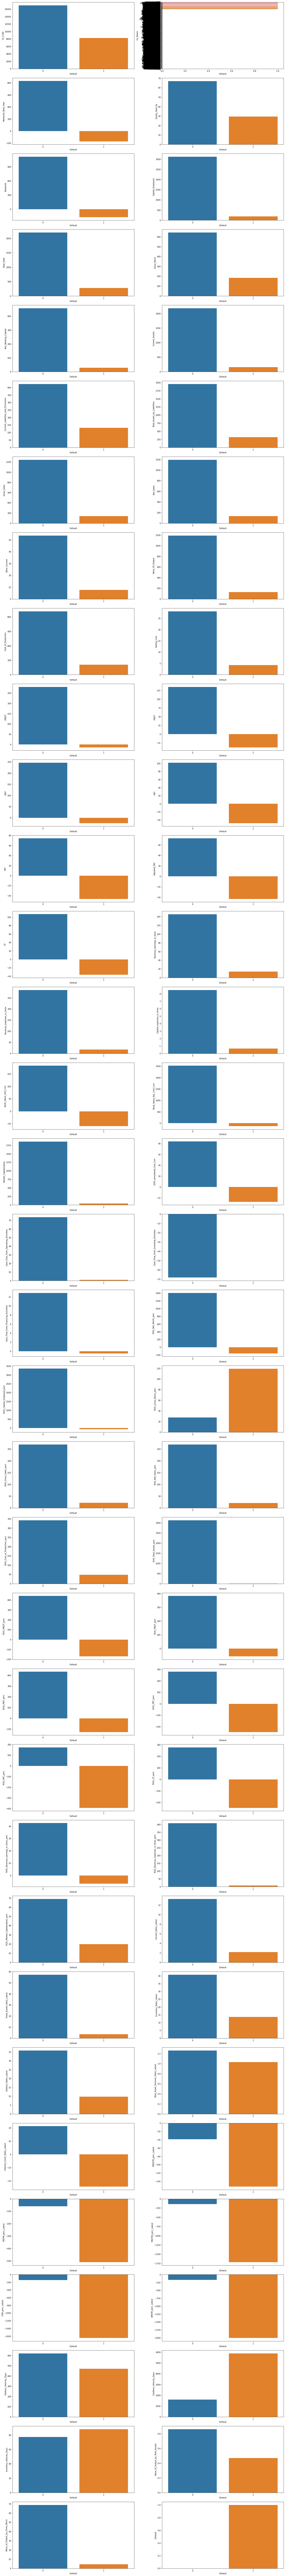

In [236]:
fig, ax = plt.subplots(figsize = (20, 180), nrows = 34, ncols = 2)

for i, col in enumerate(df.columns):
    sns.barplot(x = df['Default'], y = df[col], ax = ax[i//2, i%2],ci=None)
    
plt.tight_layout(pad = 1.1)

### Since the data set is very imbalanced. We will apply SMOTE and then we will evaluate all models on both SMOTE as well as NON - SMOTE dataset and compare

In [237]:
df_smote=df_new.copy()

In [238]:
print("Before OverSampling the shape of X: {}".format(X.shape))
print("Before OverSampling the shape of y: {}".format(y.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

Before OverSampling the shape of X: (3586, 34)
Before OverSampling the shape of y: (3586,)
Before OverSampling, counts of label '1': 387
Before OverSampling, counts of label '0': 3199 



In [239]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)

In [240]:
X_smote,y_smote=sm.fit_resample(X,y.ravel())

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [242]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote, test_size = 0.33, random_state = 42, stratify = y_smote)

In [243]:
X_train_all_scaled = X_train.copy()
X_test_all_scaled=X_test.copy()
y_train_all_scaled=y_train.copy()
y_test_all_scaled=y_test.copy()

In [244]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_all_scaled=sc.fit_transform(X_train_all_scaled)
X_test_all_scaled=sc.transform(X_test_all_scaled)

In [245]:
X_train_smote_all_scaled = X_train_smote.copy()
X_test_smote_all_scaled=X_test_smote.copy()
y_train_smote_all_scaled=y_train_smote.copy()
y_test_smote_all_scaled=y_test_smote.copy()

In [246]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_smote_all_scaled=sc.fit_transform(X_train_smote_all_scaled)
X_test_smote_all_scaled=sc.transform(X_test_smote_all_scaled)

### Concatinating X and y, so they can be used with statsmodel library

In [247]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

In [248]:
df_train

Equity_Paid_Up  Net_Working_Capital  Current_Assets  Other_Income  \
3221           39.76               236.49          476.77          8.66   
2699           13.00               199.67          253.96          1.52   
881             3.02                 4.39            5.08          0.03   
100            72.64               -84.10            7.69          0.34   
867             3.00                 2.93            3.04          0.04   
...              ...                  ...             ...           ...   
736             1.00                -0.66            2.57          0.01   
826             0.25                 0.61            0.95          0.12   
1497            2.00                 5.98            8.06          0.00   
327             5.05                -0.63            3.28          0.00   
2969           16.40                37.14          140.26         11.76   

      Selling_Cost  Revenue_earnings_in_forex  Revenue_expenses_in_forex  \
3221         18.38                       0.00                     211.54   
2699         25.77                       1.36                      30.98   
881           0.00                       0.00                       0.00   
100           0.02                       0.01                       0.00   
867           0.00                       0.00                       0.00   
...            ...                        ...                        ...   
736           0.05                       0.00                       0.00   
826           0.09                       0.00                       0.00   
1497          0.00                       0.00                       0.00   
327           0.02                       0.00                       0.00   
2969          1.13                       0.00                      22.97   

      Capital_expenses_in_forex  Book_Value_Unit_Curr  \
3221                      13.27                 73.76   
2699                       0.00                103.91   
881                        0.00                 12.58   
100                        0.00                 -8.37   
867                        0.00                 12.45   
...                         ...                   ...   
736                        0.00                 30.39   
826                        0.00                 69.44   
1497                       0.00                 59.34   
327                        0.00                 -2.76   
2969                       1.60                170.93   

      Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
3221                      73.76                 578.51   
2699                     103.91                 137.41   
881                       12.58                   0.00   
100                       -8.37                   6.32   
867                       12.45                   0.00   
...                         ...                    ...   
736                       30.39                  21.35   
826                       69.44                   0.00   
1497                      59.34                   0.00   
327                       -2.76                   0.00   
2969                     170.93                 372.44   

      CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
3221                      27.89                               157.62   
2699                      10.08                                31.06   
881                        0.50                                -0.15   
100                      -22.44                                 0.02   
867                        0.53                                 0.18   
...                         ...                                  ...   
736                        0.90                                 0.06   
826                        0.80                                 0.00   
1497                       4.30                                 3.84   
327                       -0.18                                 0.17   
2969              

In [249]:
df_test

Equity_Paid_Up  Net_Working_Capital  Current_Assets  Other_Income  \
251             2.19                -2.18            2.22          0.00   
3493          150.78               686.96         1998.71        278.61   
3062           15.70               131.17          369.93          8.91   
2383            4.73                59.21           84.56          0.66   
1678            5.84                 8.60            8.62          2.01   
...              ...                  ...             ...           ...   
1320            9.27                 8.72            8.80          0.00   
2665            4.05               181.46          203.53          3.88   
772             3.00                 1.41            2.25          0.00   
3488          375.00              2717.38         4971.20        123.41   
2955            1.44                 2.04            2.73          0.00   

      Selling_Cost  Revenue_earnings_in_forex  Revenue_expenses_in_forex  \
251           0.01                       0.00                       2.56   
3493          0.00                     938.77                     950.48   
3062         35.91                      98.12                      48.91   
2383          6.05                      19.07                      11.62   
1678          0.00                       0.00                       0.00   
...            ...                        ...                        ...   
1320          0.00                       0.00                       0.00   
2665          2.79                       0.00                       4.03   
772           0.00                       0.00                       0.00   
3488         61.49                       2.56                      57.89   
2955          0.02                       0.00                       0.00   

      Capital_expenses_in_forex  Book_Value_Unit_Curr  \
251                        0.00                -25.40   
3493                       0.00                327.02   
3062                      42.33                222.70   
2383                       0.00                 24.59   
1678                       0.00                  2.60   
...                         ...                   ...   
1320                       0.00                  9.48   
2665                       0.00                 56.30   
772                        0.00                 10.22   
3488                       1.44                103.85   
2955                       0.00               1855.62   

      Book_Value_Adj._Unit_Curr  Market_Capitalisation  \
251                      -25.40                   5.39   
3493                     327.02                5513.92   
3062                     222.70                 862.51   
2383                      24.59                  51.98   
1678                       2.60                  66.63   
...                         ...                    ...   
1320                       9.48                   0.00   
2665                      28.15                 164.03   
772                       10.22                   0.00   
3488                     103.85               10068.75   
2955                    1855.62                   0.00   

      CEPS_annualised_Unit_Curr  Cash_Flow_From_Operating_Activities  \
251                       -4.38                                -0.38   
3493                      40.82                               530.12   
3062                      63.39                                88.47   
2383                       2.47                                 4.87   
1678                       0.28                                -0.39   
...                         ...                                  ...   
1320                       0.01                                -0.29   
2665                       8.41                                12.90   
772                        0.07                                 0.00   
3488                      11.85                              -407.10   
2955              

In [250]:
df_train_smote = pd.concat([X_train_smote, pd.DataFrame(y_train_smote,index=X_train_smote.index)], axis = 1)
df_test_smote = pd.concat([X_test_smote, pd.DataFrame(y_test_smote,index=X_test_smote.index)], axis = 1)

In [251]:
df_train_smote.columns=[                   'Equity_Paid_Up',
                     'Net_Working_Capital',
                             'Curr_Assets',
                            'Other_Income',
                            'Selling_Cost',
                       'Rev_earn_in_forex',
                        'Rev_exp_in_forex',
                    'Capital_exp_in_forex',
                    'Book_Value_Unit_Curr',
                'Book_Value_Adj_Unit_Curr',
                   'Market_Capitalisation',
               'CEPS_annualised_Unit_Curr',
                      'Cash_Flow_From_Opr',
                      'Cash_Flow_From_Inv',
               'ROG_Capital_Employed_perc',
                    'ROG_Gross_Block_perc',
                      'ROG_Net_Sales_perc',
                   'ROG_Cost_of_Prod_perc',
                            'ROG_PAT_perc',
              'ROG_Rev_earn_in_forex_perc',
               'ROG_Rev_exp_in_forex_perc',
          'ROG_Market_Capitalisation_perc',
                       'Curr_Ratio_Latest',
                  'Inventory_Ratio_Latest',
                    'Debtors_Ratio_Latest',
       'Total_Asset_Turnover_Ratio_Latest',
             'Interest_Cover_Ratio_Latest',
                      'PBIDTM_perc_Latest',
                         'CPM_perc_Latest',
                        'Debtors_Vel_Days',
                      'Creditors_Vel_Days',
                      'Inventory_Vel_Days',
         'Value_of_Output_to_Total_Assets',
          'Value_of_Output_to_Gross_Block',
                        'Default']
df_train_smote

Equity_Paid_Up  Net_Working_Capital   Curr_Assets  Other_Income  \
3520      171.330000             0.000000  63504.850000    878.310000   
4077       38.417058            72.855116    173.861623     14.251370   
169        26.810000            -1.890000      2.520000     71.180000   
2227        5.090000            19.110000     34.170000      2.760000   
5019        2.363090            -2.029940      1.945640      0.014815   
...              ...                  ...           ...           ...   
2068        0.990000            14.460000     16.190000      2.140000   
1044        3.060000             2.610000      4.190000      0.000000   
5431       16.275695            23.455285    154.873980      4.513002   
4870       10.657838           -11.031630      0.809565      0.000000   
2444        8.560000            26.820000     51.880000      2.110000   

      Selling_Cost  Rev_earn_in_forex  Rev_exp_in_forex  Capital_exp_in_forex  \
3520     39.000000           0.000000          0.000000              0.000000   
4077      4.512571         126.740347          7.693189              1.912084   
169       0.010000           0.030000          0.060000              0.000000   
2227     19.550000          35.590000          1.040000              0.000000   
5019      0.010000           0.000000          0.000000              0.000000   
...            ...                ...               ...                   ...   
2068      0.060000           0.000000          0.050000              0.000000   
1044      0.140000           0.000000          0.000000              0.000000   
5431     12.195561          84.338399         22.649611              1.858693   
4870      0.000000           0.000000          0.000000              0.000000   
2444      6.900000           0.620000         16.100000              4.280000   

      Book_Value_Unit_Curr  Book_Value_Adj_Unit_Curr  Market_Capitalisation  \
3520             90.270000                 45.130000           11307.850000   
4077            -39.597972                -39.597972              56.503286   
169              -7.340000                 -7.340000               1.660000   
2227             82.020000                 16.400000              23.850000   
5019            -56.898260                -56.898260              12.243220   
...                    ...                       ...                    ...   
2068           2021.780000               2021.780000              18.240000   
1044             17.190000                 17.190000               0.000000   
5431           -127.647604               -127.647604              98.986835   
4870             -7.822147                 -7.822147               0.000000   
2444             81.490000                 72.970000              64.540000   

      CEPS_annualised_Unit_Curr  Cash_Flow_From_Opr  Cash_Flow_From_Inv  \
3520                  12.160000         5163.680000        -1364.170000   
4077                  -5.416729           -7.904363           30.278290   
169                   -0.500000            2.100000           -0.060000   
2227                   6.480000            4.570000            1.350000   
5019                  -0.841897           -0.239279            0.025923   
...                         ...                 ...                 ...   
2068                  55.560000           -6.000000            6.230000   
1044                   1.600000            0.000000            0.000000   
5431                 -17.752536           15.363111          -13.663908   
4870                  -0.108398           -0.035437            0.000000   
2444                  13.820000            9.750000          -23.390000   

      ROG_Capital_Employed_perc  ROG_Gross_Block_perc  ROG_Net_Sales_perc  \
3520                  10.900000             12.020000            6.820000   
4077                 -27.799020             77.442319          -34.930020   
169                  -72.470000            -86.520000          -88.520000  

In [252]:
df_test_smote.columns=['Equity_Paid_Up',
                     'Net_Working_Capital',
                             'Curr_Assets',
                            'Other_Income',
                            'Selling_Cost',
                       'Rev_earn_in_forex',
                        'Rev_exp_in_forex',
                    'Capital_exp_in_forex',
                    'Book_Value_Unit_Curr',
                'Book_Value_Adj_Unit_Curr',
                   'Market_Capitalisation',
               'CEPS_annualised_Unit_Curr',
                      'Cash_Flow_From_Opr',
                      'Cash_Flow_From_Inv',
               'ROG_Capital_Employed_perc',
                    'ROG_Gross_Block_perc',
                      'ROG_Net_Sales_perc',
                   'ROG_Cost_of_Prod_perc',
                            'ROG_PAT_perc',
              'ROG_Rev_earn_in_forex_perc',
               'ROG_Rev_exp_in_forex_perc',
          'ROG_Market_Capitalisation_perc',
                       'Curr_Ratio_Latest',
                  'Inventory_Ratio_Latest',
                    'Debtors_Ratio_Latest',
       'Total_Asset_Turnover_Ratio_Latest',
             'Interest_Cover_Ratio_Latest',
                      'PBIDTM_perc_Latest',
                         'CPM_perc_Latest',
                        'Debtors_Vel_Days',
                      'Creditors_Vel_Days',
                      'Inventory_Vel_Days',
         'Value_of_Output_to_Total_Assets',
          'Value_of_Output_to_Gross_Block',
                       'Default']

df_test_smote

Equity_Paid_Up  Net_Working_Capital   Curr_Assets  Other_Income  \
1157        1.050000            33.860000     52.070000      0.010000   
2240       10.710000            84.590000    138.480000      0.610000   
4438       80.699653           121.864209    195.979577      9.134490   
6376       37.422133           -17.346358      0.226512      0.015888   
704         5.570000             3.510000      5.850000      0.120000   
...              ...                  ...           ...           ...   
3509       48.490000             0.000000  53842.970000    593.970000   
294         3.650000             0.610000      0.890000      0.030000   
1596        4.150000            12.100000     12.740000      0.160000   
1184        4.830000             4.880000      9.260000      0.340000   
3174       14.020000           504.730000    549.270000      0.000000   

      Selling_Cost  Rev_earn_in_forex  Rev_exp_in_forex  Capital_exp_in_forex  \
1157      5.120000           0.000000         33.640000                  0.00   
2240     30.000000           2.340000         77.060000                  0.00   
4438      2.110969          10.657154         33.066685                  0.00   
6376      0.009411           0.000000          0.000000                  0.00   
704       0.180000           3.810000          0.000000                  0.00   
...            ...                ...               ...                   ...   
3509      9.310000           0.000000          0.000000                  0.00   
294       0.000000           0.000000          0.000000                  0.00   
1596      2.510000           0.000000          0.000000                  0.00   
1184      1.190000          20.740000         10.720000                  0.57   
3174      0.570000           0.000000          0.000000                  0.00   

      Book_Value_Unit_Curr  Book_Value_Adj_Unit_Curr  Market_Capitalisation  \
1157             40.000000                 40.000000               0.000000   
2240             41.500000                 10.390000               0.000000   
4438             -1.765872                 -1.765872               7.011896   
6376             -5.701213                 -5.701213               2.239875   
704               4.720000                  4.720000               1.390000   
...                    ...                       ...                    ...   
3509            126.000000                126.000000            4622.360000   
294              -7.720000                 -7.720000               0.000000   
1596             31.040000                 31.040000               0.000000   
1184             14.010000                 14.010000               3.370000   
3174             41.010000                 41.010000            3995.340000   

      CEPS_annualised_Unit_Curr  Cash_Flow_From_Opr  Cash_Flow_From_Inv  \
1157                  20.860000            4.940000            2.190000   
2240                   5.820000           -9.320000           -0.680000   
4438                  -1.808526           -8.359910           26.745234   
6376                  -0.219411            4.716987           -0.037645   
704                    0.700000            0.280000           -0.100000   
...                         ...                 ...                 ...   
3509                  12.020000          128.720000         -271.270000   
294                   -0.080000            0.000000            0.000000   
1596                   6.530000            5.740000           -0.730000   
1184                   1.240000            0.570000           -0.820000   
3174                   4.350000         -255.040000           -0.440000   

      ROG_Capital_Employed_perc  ROG_Gross_Block_perc  ROG_Net_Sales_perc  \
1157                 502.190000             14.020000          147.570000   
2240                  19.870000              5.560000           -3.530000   
4438                 -13.090077             -0.406209           84.391346  

In [253]:
col=[]
for i in df_train.columns[:-1]:
    col.append(i)

In [254]:
col

['Equity_Paid_Up',
 'Net_Working_Capital',
 'Current_Assets',
 'Other_Income',
 'Selling_Cost',
 'Revenue_earnings_in_forex',
 'Revenue_expenses_in_forex',
 'Capital_expenses_in_forex',
 'Book_Value_Unit_Curr',
 'Book_Value_Adj._Unit_Curr',
 'Market_Capitalisation',
 'CEPS_annualised_Unit_Curr',
 'Cash_Flow_From_Operating_Activities',
 'Cash_Flow_From_Investing_Activities',
 'ROG_Capital_Employed_perc',
 'ROG_Gross_Block_perc',
 'ROG_Net_Sales_perc',
 'ROG_Cost_of_Production_perc',
 'ROG_PAT_perc',
 'ROG_Revenue_earnings_in_forex_perc',
 'ROG_Revenue_expenses_in_forex_perc',
 'ROG_Market_Capitalisation_perc',
 'Current_Ratio_Latest',
 'Inventory_Ratio_Latest',
 'Debtors_Ratio_Latest',
 'Total_Asset_Turnover_Ratio_Latest',
 'Interest_Cover_Ratio_Latest',
 'PBIDTM_perc_Latest',
 'CPM_perc_Latest',
 'Debtors_Velocity_Days',
 'Creditors_Velocity_Days',
 'Inventory_Velocity_Days',
 'Value_of_Output_by_Total_Assets',
 'Value_of_Output_by_Gross_Block']

## Model Building using Logistic Regression for 'Probability at default'

After each model is built, the variable that has a p-value of >0.05 will be dropped as their coefficients are unreliable.

In [255]:
def metrics_eval(df,model,count,train_test,optimal_threshold_ip):
    y_prob_pred = model.predict(df)
    highest_pvalue_col_name=model.pvalues.sort_values(ascending = False).head(1).index.to_list()[0]
    highest_pvalue=model.pvalues.sort_values(ascending = False).head(1).values[0]
    if train_test=='train':
        fpr, tpr, thresholds = roc_curve(df['Default'], y_prob_pred)
        auc = roc_auc_score(df['Default'], y_prob_pred)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]
    elif train_test=='test':
        auc = roc_auc_score(df['Default'], y_prob_pred)
        optimal_threshold=optimal_threshold_ip      
    y_class_pred=[]
    for i in range(0,len(y_prob_pred)):
        if np.array(y_prob_pred)[i] > optimal_threshold:
            a=1
        else:
            a=0
        y_class_pred.append(a)
    dict_metrics={'ModelType':'Logit',
        'Model_Name':'Model_'+str(count),
          'Accuracy':accuracy_score(df['Default'], y_class_pred),
          'F1 Score':f1_score(df['Default'], y_class_pred),
          'Recall':recall_score(df['Default'], y_class_pred),
          'Precision':precision_score(df['Default'], y_class_pred),
                  'AUC':auc,
                  'Optimal_Thresh':optimal_threshold,
                 'Dropped_Column':highest_pvalue_col_name,
                 'Dropped_col_pvalue':highest_pvalue}
    return dict_metrics,optimal_threshold

In [256]:
def logit_model_eval(df_train,df_test,num_of_models):
    df_metrics_test=pd.DataFrame(columns=['ModelType','Model_Name','Accuracy','F1 Score','Recall','Precision',
                                          'AUC',
                                          'Optimal_Thresh',
                                          'Dropped_Column',
                                         'Dropped_col_pvalue'])
    df_metrics_train=pd.DataFrame(columns=['ModelType','Model_Name','Accuracy','F1 Score','Recall','Precision',
                                           'Optimal_Thresh','AUC',
                                           'Dropped_Column','Dropped_col_pvalue'])
    model_list=[]
    col=[]
    for i in df_train.columns[:-1]:
        col.append(i)
    count=1
    for i in np.arange(1,num_of_models):
        text=""
        j=0
        for k in col:
            if j==0:
                j=j+1
                text='Default ~ '
            if j==1:
                j=j+1
                text=text+k
            else:
                text=text+" + "+k
        model = SM.logit(formula = text, data = df_train).fit(maxiter = 10000, method = 'bfgs',disp=0)
        highest_pvalue=model.pvalues.sort_values(ascending = False).head(1).values[0]
        highest_pvalue_col_name=model.pvalues.sort_values(ascending = False).head(1).index.to_list()[0]

        if highest_pvalue > 0.05:
            col=list(filter(lambda x: x != highest_pvalue_col_name,col))
            #-------------------------------validation Train Set -----------------------------------
            dict_metrics_train,optimal_threshold_op=metrics_eval(df_train,model,count,train_test="train",
                                                              optimal_threshold_ip=None)
            df_metrics_train=df_metrics_train.append(dict_metrics_train,ignore_index=True)
            #print("train model number"+str(count))
            #-------------------------------validation Test Set -----------------------------------
            dict_metrics_test,optimal_threshold_op=metrics_eval(df_test,model,count,train_test="test",
                                           optimal_threshold_ip=optimal_threshold_op)
            df_metrics_test=df_metrics_test.append(dict_metrics_test,ignore_index=True)
            #print("test model number"+str(count))
            model_list.append(model)
            count=count+1
            continue
        else:
            #-------------------------------validation Train Set -----------------------------------
            dict_metrics_train,optimal_threshold_op=metrics_eval(df_train,model,count,train_test="train",
                                                              optimal_threshold_ip=None)
            df_metrics_train=df_metrics_train.append(dict_metrics_train,ignore_index=True)
            #-------------------------------validation Test Set -----------------------------------
            dict_metrics_test,optimal_threshold_op=metrics_eval(df_test,model,count,train_test="test",
                                           optimal_threshold_ip=optimal_threshold_op)
            df_metrics_test=df_metrics_test.append(dict_metrics_test,ignore_index=True)
            model_list.append(model)
            count=count+1
            break
    return model_list,df_metrics_train,df_metrics_test

In [257]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [258]:
df_train.rename(columns={'Book_Value_Adj._Unit_Curr':'Book_Value_Adj_Unit_Curr'},inplace=True)
df_test.rename(columns={'Book_Value_Adj._Unit_Curr':'Book_Value_Adj_Unit_Curr'},inplace=True)

In [259]:
model_list,df_metrics_train_logit,df_metrics_test_logit=logit_model_eval(df_train,df_test,num_of_models=300)

In [260]:
df_metrics_train_logit.sort_values(by='Accuracy',ascending=False)

ModelType Model_Name  Accuracy  F1 Score    Recall  Precision  \
30     Logit   Model_31  0.974604  0.885122  0.907336   0.863971   
23     Logit   Model_24  0.972107  0.872381  0.884170   0.860902   
22     Logit   Model_23  0.972107  0.871893  0.880309   0.863636   
29     Logit   Model_30  0.970441  0.868762  0.907336   0.833333   
28     Logit   Model_29  0.970441  0.868762  0.907336   0.833333   
27     Logit   Model_28  0.969192  0.863971  0.907336   0.824561   
25     Logit   Model_26  0.965862  0.851449  0.907336   0.802048   
24     Logit   Model_25  0.965029  0.848375  0.907336   0.796610   
26     Logit   Model_27  0.963364  0.842294  0.907336   0.785953   
20     Logit   Model_21  0.954621  0.808436  0.888031   0.741935   
15     Logit   Model_16  0.951291  0.798623  0.895753   0.720497   
16     Logit   Model_17  0.950874  0.797251  0.895753   0.718266   
17     Logit   Model_18  0.950874  0.797251  0.895753   0.718266   
18     Logit   Model_19  0.950458  0.795883  0.895753   0.716049   
14     Logit   Model_15  0.947544  0.785714  0.891892   0.702128   
0      Logit    Model_1  0.945462  0.779089  0.891892   0.691617   
1      Logit    Model_2  0.945462  0.779089  0.891892   0.691617   
2      Logit    Model_3  0.945462  0.779089  0.891892   0.691617   
3      Logit    Model_4  0.945462  0.779089  0.891892   0.691617   
13     Logit   Model_14  0.945046  0.778523  0.895753   0.688427   
4      Logit    Model_5  0.944629  0.776471  0.891892   0.687500   
6      Logit    Model_7  0.944629  0.777219  0.895753   0.686391   
5      Logit    Model_6  0.944213  0.775168  0.891892   0.685460   
8      Logit    Model_9  0.944213  0.775920  0.895753   0.684366   
7      Logit    Model_8  0.943797  0.774624  0.895753   0.682353   
12     Logit   Model_13  0.943381  0.774086  0.899614   0.679300   
11     Logit   Model_12  0.942964  0.772803  0.899614   0.677326   
9      Logit   Model_10  0.942548  0.771523  0.899614   0.675362   
19     Logit   Model_20  0.941715  0.769737  0.903475   0.670487   
10     Logit   Model_11  0.941299  0.767710  0.899614   0.669540   
21     Logit   Model_22  0.939217  0.762987  0.907336   0.658263   

    Optimal_Thresh       AUC                       Dropped_Column  \
30        0.242419  0.965672          Interest_Cover_Ratio_Latest   
23        0.264316  0.965502                   ROG_Net_Sales_perc   
22        0.269591  0.963919            CEPS_annualised_Unit_Curr   
29        0.239166  0.965609   ROG_Revenue_earnings_in_forex_perc   
28        0.239025  0.965591  Cash_Flow_From_Investing_Activities   
27        0.242582  0.966582                Market_Capitalisation   
25        0.248588  0.965848                Debtors_Velocity_Days   
24        0.247138  0.965807              Creditors_Velocity_Days   
26        0.244257  0.965587                 Current_Ratio_Latest   
20        0.241059  0.963047    Total_Asset_Turnover_Ratio_Latest   
15        0.237934  0.963099            Revenue_expenses_in_forex   
16        0.236870  0.962953                         Other_Income   
17        0.238345  0.963187                       Current_Assets   
18        0.237081  0.963146                 ROG_Gross_Block_perc   
14        0.233723  0.961894                         ROG_PAT_perc   
0         0.230723  0.962216            Revenue_earnings_in_forex   
1         0.230697  0.962221                   PBIDTM_perc_Latest   
2         0.230696  0.962218            Capital_expenses_in_forex   
3         0.230463  0.962167   ROG_Revenue_expenses_in_forex_perc   
13        0.227467  0.961915                      CPM_perc_Latest   
4         0.229571  0.962137              Inventory_Velocity_Days   
6         0.226128  0.962189             Book_Value_Adj_Unit_Curr   
5         0.225863  0.962194          ROG_Cost_of_Production_perc   
8         0.225976  0.962373       ROG_Market_Capitalisation_perc   
7         0.225589  0.962275                       Equity_Paid_Up   
12        0.224007  0.961922    

In [261]:
df_metrics_test_logit.sort_values(by='Accuracy',ascending=False)

ModelType Model_Name  Accuracy  F1 Score    Recall  Precision       AUC  \
30     Logit   Model_31  0.963682  0.835249  0.851562   0.819549  0.960138   
29     Logit   Model_30  0.961993  0.830189  0.859375   0.802920  0.958163   
28     Logit   Model_29  0.961993  0.830189  0.859375   0.802920  0.958126   
22     Logit   Model_23  0.961149  0.823077  0.835938   0.810606  0.958707   
27     Logit   Model_28  0.957770  0.813433  0.851562   0.778571  0.956284   
23     Logit   Model_24  0.957770  0.810606  0.835938   0.786765  0.960102   
25     Logit   Model_26  0.954392  0.801471  0.851562   0.756944  0.956846   
26     Logit   Model_27  0.953547  0.800000  0.859375   0.748299  0.958148   
24     Logit   Model_25  0.953547  0.798535  0.851562   0.751724  0.959754   
20     Logit   Model_21  0.945101  0.771930  0.859375   0.700637  0.958781   
17     Logit   Model_18  0.943412  0.766551  0.859375   0.691824  0.951612   
18     Logit   Model_19  0.940878  0.758621  0.859375   0.679012  0.951375   
16     Logit   Model_17  0.940034  0.757679  0.867188   0.672727  0.951427   
15     Logit   Model_16  0.939189  0.753425  0.859375   0.670732  0.951190   
14     Logit   Model_15  0.938345  0.750853  0.859375   0.666667  0.950391   
13     Logit   Model_14  0.936655  0.747475  0.867188   0.656805  0.950055   
3      Logit    Model_4  0.934966  0.740741  0.859375   0.650888  0.947599   
19     Logit   Model_20  0.934966  0.744186  0.875000   0.647399  0.958796   
1      Logit    Model_2  0.934122  0.738255  0.859375   0.647059  0.947014   
2      Logit    Model_3  0.934122  0.738255  0.859375   0.647059  0.947066   
4      Logit    Model_5  0.934122  0.738255  0.859375   0.647059  0.947525   
0      Logit    Model_1  0.934122  0.738255  0.859375   0.647059  0.946992   
12     Logit   Model_13  0.934122  0.740000  0.867188   0.645349  0.950254   
6      Logit    Model_7  0.932432  0.733333  0.859375   0.639535  0.947266   
5      Logit    Model_6  0.932432  0.733333  0.859375   0.639535  0.947362   
8      Logit    Model_9  0.931588  0.730897  0.859375   0.635838  0.947584   
7      Logit    Model_8  0.930743  0.728477  0.859375   0.632184  0.947236   
11     Logit   Model_12  0.930743  0.732026  0.875000   0.629213  0.948797   
21     Logit   Model_22  0.929899  0.729642  0.875000   0.625698  0.958751   
9      Logit   Model_10  0.929054  0.723684  0.859375   0.625000  0.947502   
10     Logit   Model_11  0.928209  0.724919  0.875000   0.618785  0.948597   

    Optimal_Thresh                       Dropped_Column  Dropped_col_pvalue  
30        0.242419          Interest_Cover_Ratio_Latest            0.009255  
29        0.239166   ROG_Revenue_earnings_in_forex_perc            0.087471  
28        0.239025  Cash_Flow_From_Investing_Activities            0.874747  
22        0.269591            CEPS_annualised_Unit_Curr            0.180432  
27        0.242582                Market_Capitalisation            0.066425  
23        0.264316                   ROG_Net_Sales_perc            0.132522  
25        0.248588                Debtors_Velocity_Days            0.280720  
26        0.244257                 Current_Ratio_Latest            0.081573  
24        0.247138              Creditors_Velocity_Days            0.120690  
20        0.241059    Total_Asset_Turnover_Ratio_Latest            0.204915  
17        0.238345                       Current_Assets            0.468765  
18        0.237081                 ROG_Gross_Block_perc            0.294245  
16        0.236870                         Other_Income            0.348875  
15        0.237934            Revenue_expenses_in_forex            0.301599  
14        0.233723                         ROG_PAT_perc            0.315184  
13        0.227467                      CPM_perc_Latest            0.369319  
3         0.230463   ROG_Revenue_expenses_in_forex_perc            0.796679  
19        0.217366                         Selling_Cost            0.270144  
1         0.230697      

### Finding the best model

In [262]:
model_list

In [263]:
best_model=model_list[df_metrics_test_logit.sort_values(by='Accuracy',ascending=False).index[0]]
best_model

In [264]:
print(best_model.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2397
Method:                           MLE   Df Model:                            4
Date:                Sat, 15 Oct 2022   Pseudo R-squ.:                  0.4909
Time:                        23:42:10   Log-Likelihood:                -418.18
converged:                       True   LL-Null:                       -821.36
Covariance Type:            nonrobust   LLR p-value:                3.232e-173
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -1.0835      0.096    -11.294      0.000      -1.272      -0.895
Book_Value_Unit_Curr                   -0.1147      0.00

### Training Set

In [265]:
y_prob_pred_train = best_model.predict(df_train)

In [266]:
fpr, tpr, thresholds = roc_curve(df_train['Default'], y_prob_pred_train)

In [267]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.24241863890593734

In [268]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

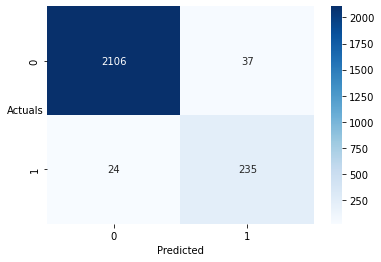

In [269]:
sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [270]:
print(metrics.classification_report(df_train['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

           0      0.989     0.983     0.986      2143
           1      0.864     0.907     0.885       259

    accuracy                          0.975      2402
   macro avg      0.926     0.945     0.935      2402
weighted avg      0.975     0.975     0.975      2402



AUC: 0.966


Text(0.5, 1.0, 'Test Data - ROC Curve')

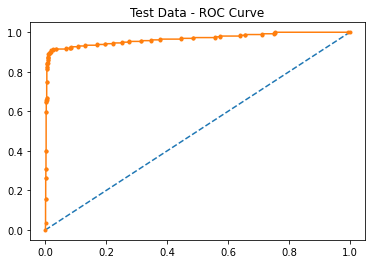

In [271]:
auc = roc_auc_score(df_train['Default'], y_prob_pred_train)
print('AUC: %.3f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Test Data - ROC Curve')

### Testing Set

In [272]:
y_prob_pred_test = best_model.predict(df_test)

In [273]:
fpr, tpr, thresholds = roc_curve(df_test['Default'], y_prob_pred_test)

In [274]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

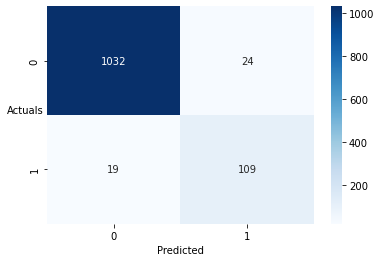

In [275]:
sns.heatmap((metrics.confusion_matrix(df_test['Default'], y_class_pred)), annot = True,fmt = '.5g', cmap = 'Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=0);

In [276]:
print(metrics.classification_report(df_test['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

           0      0.982     0.977     0.980      1056
           1      0.820     0.852     0.835       128

    accuracy                          0.964      1184
   macro avg      0.901     0.914     0.907      1184
weighted avg      0.964     0.964     0.964      1184



AUC: 0.960


Text(0.5, 1.0, 'Test Data - ROC Curve')

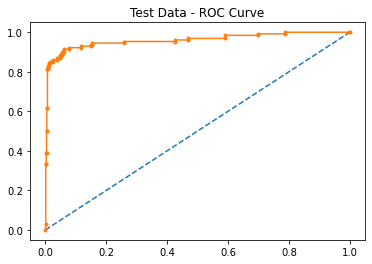

In [277]:
auc = roc_auc_score(df_test['Default'], y_prob_pred_test)
print('AUC: %.3f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Test Data - ROC Curve')

## Final Metrics - Logit using SM without SMOTE

In [278]:
final_logit_sm_metrics=pd.concat([df_metrics_train_logit.sort_values(by='Accuracy',ascending=False)[['Accuracy','Precision','Recall',
                                                                              'F1 Score','AUC']
                                                                            ].head(1),
           df_metrics_test_logit.sort_values(by='Accuracy',ascending=False)[['Accuracy','Precision','Recall',
                                                                             'F1 Score','AUC']
                                                                           ].head(1)])
final_logit_sm_metrics.index=['Logit_SM_Train','Logit_SM_Test']

In [279]:
final_logit_sm_metrics

Accuracy  Precision    Recall  F1 Score       AUC
Logit_SM_Train  0.974604   0.863971  0.907336  0.885122  0.965672
Logit_SM_Test   0.963682   0.819549  0.851562  0.835249  0.960138

### Evaluating for SMOTE data

In [280]:
model_list_smote,df_metrics_train_smote_logit,df_metrics_test_smote_logit=logit_model_eval(df_train_smote,
                                                                                     df_test_smote,
                                                                         num_of_models=200)

In [281]:
df_metrics_train_smote_logit.sort_values(by='Accuracy',ascending=False)

ModelType Model_Name  Accuracy  F1 Score    Recall  Precision  \
1       Logit    Model_2  0.946104  0.944484  0.916939   0.973736   
2       Logit    Model_3  0.946104  0.944484  0.916939   0.973736   
11      Logit   Model_12  0.946104  0.944564  0.918339   0.972332   
4       Logit    Model_5  0.946104  0.944431  0.916006   0.974677   
5       Logit    Model_6  0.946104  0.944431  0.916006   0.974677   
..        ...        ...       ...       ...       ...        ...   
75      Logit   Model_76  0.500000  0.000000  0.000000   0.000000   
76      Logit   Model_77  0.500000  0.000000  0.000000   0.000000   
77      Logit   Model_78  0.500000  0.000000  0.000000   0.000000   
78      Logit   Model_79  0.500000  0.000000  0.000000   0.000000   
198     Logit  Model_199  0.500000  0.000000  0.000000   0.000000   

     Optimal_Thresh       AUC                  Dropped_Column  \
1          0.663131  0.980490                    Other_Income   
2          0.663225  0.980499                    Selling_Cost   
11         0.662255  0.980518  ROG_Market_Capitalisation_perc   
4          0.665219  0.980491               Rev_earn_in_forex   
5          0.665204  0.980517              Cash_Flow_From_Opr   
..              ...       ...                             ...   
75         1.500000  0.500000                       Intercept   
76         1.500000  0.500000                       Intercept   
77         1.500000  0.500000                       Intercept   
78         1.500000  0.500000                       Intercept   
198        1.500000  0.500000                       Intercept   

     Dropped_col_pvalue  
1              0.890926  
2              0.914585  
11             0.309716  
4              0.659108  
5              0.641377  
..                  ...  
75             1.000000  
76             1.000000  
77             1.000000  
78             1.000000  
198            1.000000  

[199 rows x 10 columns]

In [282]:
df_metrics_test_smote_logit.sort_values(by='Accuracy',ascending=False)

ModelType Model_Name  Accuracy  F1 Score    Recall  Precision       AUC  \
9       Logit   Model_10  0.936553  0.934761  0.909091   0.961924  0.973314   
12      Logit   Model_13  0.936553  0.934825  0.910038   0.961000  0.972982   
11      Logit   Model_12  0.936553  0.934951  0.911932   0.959163  0.972973   
0       Logit    Model_1  0.936080  0.934050  0.905303   0.964682  0.973366   
2       Logit    Model_3  0.936080  0.934307  0.909091   0.960961  0.973279   
..        ...        ...       ...       ...       ...        ...       ...   
75      Logit   Model_76  0.500000  0.000000  0.000000   0.000000  0.500000   
76      Logit   Model_77  0.500000  0.000000  0.000000   0.000000  0.500000   
77      Logit   Model_78  0.500000  0.000000  0.000000   0.000000  0.500000   
78      Logit   Model_79  0.500000  0.000000  0.000000   0.000000  0.500000   
198     Logit  Model_199  0.500000  0.000000  0.000000   0.000000  0.500000   

     Optimal_Thresh                  Dropped_Column  Dropped_col_pvalue  
9          0.665144           ROG_Cost_of_Prod_perc            0.429556  
12         0.661503        Book_Value_Adj_Unit_Curr            0.302910  
11         0.662255  ROG_Market_Capitalisation_perc            0.309716  
0          0.671042            ROG_Gross_Block_perc            0.932592  
2          0.663225                    Selling_Cost            0.914585  
..              ...                             ...                 ...  
75         1.500000                       Intercept            1.000000  
76         1.500000                       Intercept            1.000000  
77         1.500000                       Intercept            1.000000  
78         1.500000                       Intercept            1.000000  
198        1.500000                       Intercept            1.000000  

[199 rows x 10 columns]

In [283]:
best_model_smote=model_list[df_metrics_test_smote_logit.sort_values(by='Accuracy',ascending=False).index[0]]
best_model_smote

In [284]:
print(best_model_smote.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                           25
Date:                Sat, 15 Oct 2022   Pseudo R-squ.:                  0.5160
Time:                        23:42:53   Log-Likelihood:                -397.55
converged:                       True   LL-Null:                       -821.36
Covariance Type:            nonrobust   LLR p-value:                1.072e-162
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.8530      0.123     -6.940      0.000      -1.094      -0.612
Net_Working_Capital                    -0.0002      0.00

In [285]:
df_train_smote.rename(columns={'Curr_Assets':'Current_Assets'},inplace=True)

In [286]:
df_train_smote.rename(columns={'Rev_earn_in_forex':'Revenue_expenses_in_forex'},inplace=True)

In [287]:
df_train_smote.rename(columns={'Cash_Flow_From_Opr':'Cash_Flow_From_Operating_Activities'},inplace=True)

In [288]:
df_train_smote.rename(columns={'Cash_Flow_From_Inv':'Cash_Flow_From_Investing_Activities'},inplace=True)

In [289]:
df_train_smote.rename(columns={'ROG_Rev_earn_in_forex_perc':'ROG_Revenue_earnings_in_forex_perc'},inplace=True)

In [290]:
df_train_smote.rename(columns={'Curr_Ratio_Latest':'Current_Ratio_Latest'},inplace=True)

In [291]:
df_train_smote.rename(columns={'Debtors_Vel_Days':'Debtors_Velocity_Days'},inplace=True)

In [292]:
df_train_smote.rename(columns={'Creditors_Vel_Days':'Creditors_Velocity_Days'},inplace=True)

In [293]:
df_train_smote.rename(columns={'Value_of_Output_to_Gross_Block':'Value_of_Output_by_Gross_Block'},inplace=True)

In [294]:
df_train_smote.rename(columns={'Value_of_Output_to_Total_Assets':'Value_of_Output_by_Total_Assets'},inplace=True)

In [295]:
df_train_smote.columns

Index(['Equity_Paid_Up', 'Net_Working_Capital', 'Current_Assets',
       'Other_Income', 'Selling_Cost', 'Revenue_expenses_in_forex',
       'Rev_exp_in_forex', 'Capital_exp_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Prod_perc',
       'ROG_PAT_perc', 'ROG_Revenue_earnings_in_forex_perc',
       'ROG_Rev_exp_in_forex_perc', 'ROG_Market_Capitalisation_perc',
       'Current_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest', 'CPM_perc_Latest',
       'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Inventory_Vel_Days', 'Value_of_Output_by_Total_Assets',
       'Value_of_Output_by_Gross_Block', 'Def

In [296]:
y_prob_pred_train_smote = best_model_smote.predict(df_train_smote)

In [297]:
fpr_smote, tpr_smote, thresholds_smote = roc_curve(df_train_smote['Default'], y_prob_pred_train_smote)

In [298]:
optimal_idx_smote = np.argmax(tpr_smote - fpr_smote)
optimal_threshold_smote = thresholds_smote[optimal_idx_smote]
optimal_threshold_smote

0.2579999364177081

In [299]:
y_class_pred_smote=[]
for i in range(0,len(y_prob_pred_train_smote)):
    if np.array(y_prob_pred_train_smote)[i] > optimal_threshold_smote:
        a=1
    else:
        a=0
    y_class_pred_smote.append(a)

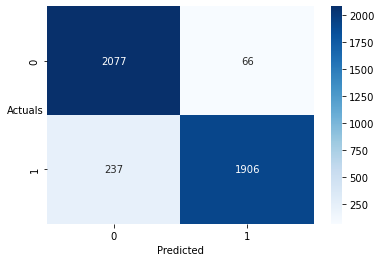

In [300]:
sns.heatmap((metrics.confusion_matrix(df_train_smote['Default'],y_class_pred_smote)),annot=True,
            fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [301]:
print(metrics.classification_report(df_train_smote['Default'], y_class_pred_smote, digits=3))

              precision    recall  f1-score   support

           0      0.898     0.969     0.932      2143
           1      0.967     0.889     0.926      2143

    accuracy                          0.929      4286
   macro avg      0.932     0.929     0.929      4286
weighted avg      0.932     0.929     0.929      4286



AUC: 0.970


Text(0.5, 1.0, 'Test Data - ROC Curve')

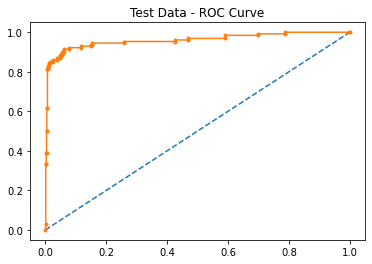

In [302]:
auc = roc_auc_score(df_train_smote['Default'], y_prob_pred_train_smote)
print('AUC: %.3f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Test Data - ROC Curve')

In [303]:
df_test_smote.rename(columns={'Curr_Assets':'Current_Assets'},inplace=True)

df_test_smote.rename(columns={'Rev_earn_in_forex':'Revenue_expenses_in_forex'},inplace=True)

df_test_smote.rename(columns={'Cash_Flow_From_Opr':'Cash_Flow_From_Operating_Activities'},inplace=True)

df_test_smote.rename(columns={'Cash_Flow_From_Inv':'Cash_Flow_From_Investing_Activities'},inplace=True)

df_test_smote.rename(columns={'ROG_Rev_earn_in_forex_perc':'ROG_Revenue_earnings_in_forex_perc'},inplace=True)

df_test_smote.rename(columns={'Curr_Ratio_Latest':'Current_Ratio_Latest'},inplace=True)

df_test_smote.rename(columns={'Debtors_Vel_Days':'Debtors_Velocity_Days'},inplace=True)

df_test_smote.rename(columns={'Creditors_Vel_Days':'Creditors_Velocity_Days'},inplace=True)

df_test_smote.rename(columns={'Value_of_Output_to_Gross_Block':'Value_of_Output_by_Gross_Block'},inplace=True)

In [304]:
df_test_smote.rename(columns={'Value_of_Output_to_Total_Assets':'Value_of_Output_by_Total_Assets'},inplace=True)

In [305]:
df_test_smote.columns

Index(['Equity_Paid_Up', 'Net_Working_Capital', 'Current_Assets',
       'Other_Income', 'Selling_Cost', 'Revenue_expenses_in_forex',
       'Rev_exp_in_forex', 'Capital_exp_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Prod_perc',
       'ROG_PAT_perc', 'ROG_Revenue_earnings_in_forex_perc',
       'ROG_Rev_exp_in_forex_perc', 'ROG_Market_Capitalisation_perc',
       'Current_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest', 'CPM_perc_Latest',
       'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Inventory_Vel_Days', 'Value_of_Output_by_Total_Assets',
       'Value_of_Output_by_Gross_Block', 'Def

In [306]:
y_prob_pred_test_smote = best_model_smote.predict(df_test_smote)

In [307]:
y_class_pred_smote=[]
for i in range(0,len(y_prob_pred_test_smote)):
    if np.array(y_prob_pred_test_smote)[i] > optimal_threshold_smote:
        a=1
    else:
        a=0
    y_class_pred_smote.append(a)

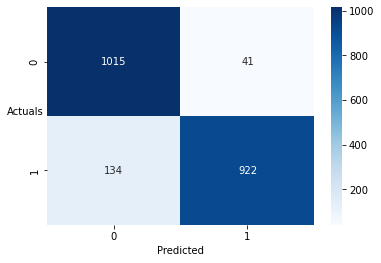

In [308]:
sns.heatmap((metrics.confusion_matrix(df_test_smote['Default'], y_class_pred_smote)), annot = True,
            fmt = '.5g', cmap = 'Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=0);

In [309]:
print(metrics.classification_report(df_test_smote['Default'], y_class_pred_smote, digits=3))

              precision    recall  f1-score   support

           0      0.883     0.961     0.921      1056
           1      0.957     0.873     0.913      1056

    accuracy                          0.917      2112
   macro avg      0.920     0.917     0.917      2112
weighted avg      0.920     0.917     0.917      2112



AUC: 0.961


Text(0.5, 1.0, 'Test Data - ROC Curve')

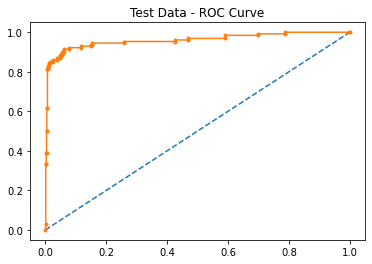

In [310]:
auc = roc_auc_score(df_test_smote['Default'], y_prob_pred_test_smote)
print('AUC: %.3f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('Test Data - ROC Curve')

## Final Metrics - Logit using SM with SMOTE

In [311]:
final_logit_sm_smote_metrics=pd.concat([df_metrics_train_smote_logit.sort_values(by='Accuracy',ascending=False)[['Accuracy','Precision','Recall',
                                                                              'F1 Score','AUC']
                                                                            ].head(1),
           df_metrics_test_smote_logit.sort_values(by='Accuracy',ascending=False)[['Accuracy','Precision','Recall',
                                                                             'F1 Score','AUC']
                                                                           ].head(1)])
final_logit_sm_smote_metrics.index=['Logit_SM_Train_SMOTE','Logit_SM_Test_SMOTE']

In [312]:
final_logit_sm_smote_metrics

Accuracy  Precision    Recall  F1 Score       AUC
Logit_SM_Train_SMOTE  0.946104   0.973736  0.916939  0.944484  0.980490
Logit_SM_Test_SMOTE   0.936553   0.961924  0.909091  0.934761  0.973314

## Generic Function for other models

In [313]:
def apply_evl(name,model,param_grid,X_train,X_test,y_train,y_test):
    test_metrics_dict={}
    train_metrics_dict={}
    from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
    from sklearn.model_selection import GridSearchCV
    print(name)
    if param_grid!=None:    
        grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3,n_jobs=4)
        gs=grid_search.fit(X_train,y_train)
        print("--------------------Best Parameters--------------------")
        print(gs.best_params_)
        best_model=gs.best_estimator_
        print()
        print()
        print("--------------------Best Model Params--------------------")
        print(best_model)
        print()
        print()
        ytrain_predict = best_model.predict(X_train)
        ytest_predict = best_model.predict(X_test)
    elif param_grid == None:
        best_model=model
        best_model.fit(X_train,y_train)
        ytrain_predict = best_model.predict(X_train)
        ytest_predict = best_model.predict(X_test)
    
    print("Train Accuracy Score for model {} is {}".format(model,accuracy_score(y_train,ytrain_predict)))
    print()
    print()
    print("--------------------Classification Report - Train Data--------------------")
    print(classification_report(y_train,ytrain_predict))
    print("------------------------------------------------------------")
    print()
    print()
    sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',
            cbar=False,cmap='YlGnBu')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix - Train Data')
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
    
        # AUC and ROC for the training data

    # predict probabilities
    probs = best_model.predict_proba(X_train)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_train, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    from sklearn.metrics import roc_curve
    fpr_train, tpr_train, thresholds = roc_curve(y_train, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr_train, tpr_train, marker='.')
    plt.title('Train Data - ROC Curve')
    # show the plot
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
    
        
#     train_metrics_dict.update({"Accuracy":accuracy_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"Precision":precision_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"Recall":recall_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"F1":f1_score(y_train,ytrain_predict)})
#     train_metrics_dict.update({"AUC":roc_auc_score(y_train,probs)})
#     train_metrics_df=pd.DataFrame(train_metrics_dict,index=[name+"_Train"]).T

    train_metrics_dict.update({name+"_Train":[accuracy_score(y_train,ytrain_predict),precision_score(y_train,ytrain_predict),
                                                recall_score(y_train,ytrain_predict),f1_score(y_train,ytrain_predict),
                                                roc_auc_score(y_train,probs),fpr_train,tpr_train]})
    train_metrics_df=pd.DataFrame(train_metrics_dict,index=['Accuracy','Precision','Recall','F1','AUC','FPR',
                                                            'TPR'])
    
    
    print()
    print()
    
    print("Test Accuracy Score for model {} is {}".format(model,accuracy_score(y_test,ytest_predict)))
    print()
    print()
    print("--------------------Classification Report - Test Data--------------------")
    print(classification_report(y_test,ytest_predict))
    print("------------------------------------------------------------")
    print()
    print()
    sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',
            cbar=False,cmap='YlGnBu')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title('Confusion Matrix - Test Data')
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
    
        # AUC and ROC for the training data

    # predict probabilities
    probs = best_model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve
    from sklearn.metrics import roc_curve
    fpr_test, tpr_test, thresholds = roc_curve(y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr_test, tpr_test, marker='.')
    plt.title('Test Data - ROC Curve')
    # show the plot
    plt.show()
    print()
    print()
    print("------------------------------------------------------------")
       
    
    test_metrics_dict.update({name+"_Test":[accuracy_score(y_test,ytest_predict),precision_score(y_test,ytest_predict),
                                            recall_score(y_test,ytest_predict),f1_score(y_test,ytest_predict),
                                            roc_auc_score(y_test,probs),fpr_test,tpr_test]})
    test_metrics_df=pd.DataFrame(test_metrics_dict,index=['Accuracy','Precision','Recall','F1','AUC','FPR','TPR'])
    return pd.concat([train_metrics_df,test_metrics_df],axis=1),best_model

### Logit Using Sklearn - All Unscaled Without SMOTE

In [314]:
X.shape

(3586, 34)

In [315]:
y.shape

(3586,)

In [316]:
param_grid_lr_unscaled={'penalty':['l1','l2', 'elasticnet', 'none'],
      'solver':['sag','lbfgs','liblinear','newton-cg','saga'],
      'tol':[0.0001,0.00001,0.000001,0.0000001,0.00000001],
      'max_iter':[100,200,300],
               'random_state':[0,1,21,23]}

LogisticRegression_Unscaled
--------------------Best Parameters--------------------
{'max_iter': 300, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(max_iter=300, random_state=0)


Train Accuracy Score for model LogisticRegression() is 0.9708576186511241


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2143
           1       0.94      0.78      0.85       259

    accuracy                           0.97      2402
   macro avg       0.96      0.89      0.92      2402
weighted avg       0.97      0.97      0.97      2402

------------------------------------------------------------




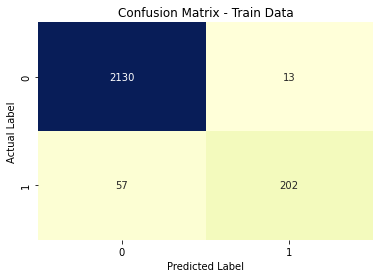



------------------------------------------------------------
AUC: 0.963


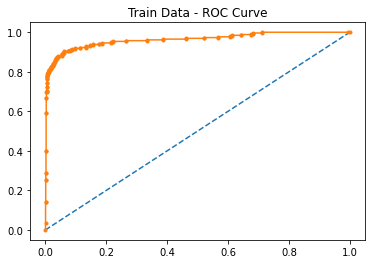



------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.956081081081081


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1056
           1       0.87      0.70      0.78       128

    accuracy                           0.96      1184
   macro avg       0.92      0.84      0.88      1184
weighted avg       0.95      0.96      0.95      1184

------------------------------------------------------------




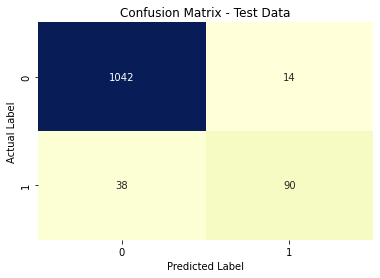



------------------------------------------------------------
AUC: 0.942


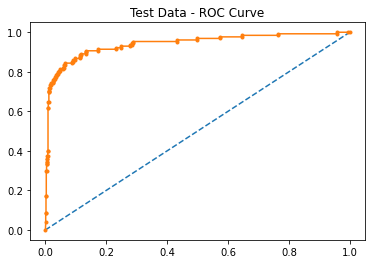



------------------------------------------------------------


In [317]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
final_logit_sklearn_unscaled_metrics,best_model_lr=apply_evl("LogisticRegression_Unscaled",lr,
                                                              param_grid_lr_unscaled,X_train,X_test,y_train,y_test)

In [318]:
final_logit_sklearn_unscaled_metrics.T[['Accuracy','Precision','Recall','F1','AUC']]

Accuracy Precision    Recall        F1  \
LogisticRegression_Unscaled_Train  0.970858  0.939535  0.779923  0.852321   
LogisticRegression_Unscaled_Test   0.956081  0.865385  0.703125  0.775862   

                                        AUC  
LogisticRegression_Unscaled_Train  0.962838  
LogisticRegression_Unscaled_Test    0.94215

### Logit Using Sklearn - Scaled Without SMOTE

In [319]:
param_grid_lr_scaled={'penalty':['l1','l2', 'elasticnet', 'none'],
      'solver':['sag','lbfgs','liblinear','newton-cg','saga'],
      'tol':[0.0001,0.00001,0.000001,0.0000001,0.00000001],
      'max_iter':[100,200,300],
               'random_state':[0,1,21,23]}

LogisticRegression_Scaled
--------------------Best Parameters--------------------
{'max_iter': 300, 'penalty': 'none', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(max_iter=300, penalty='none', random_state=0)


Train Accuracy Score for model LogisticRegression() is 0.9471273938384679


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2143
           1       0.96      0.53      0.68       259

    accuracy                           0.95      2402
   macro avg       0.95      0.77      0.83      2402
weighted avg       0.95      0.95      0.94      2402

------------------------------------------------------------




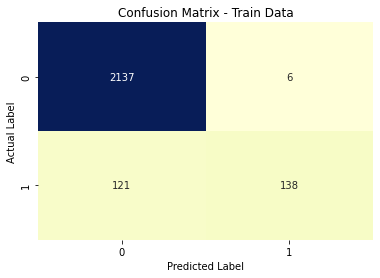



------------------------------------------------------------
AUC: 0.962


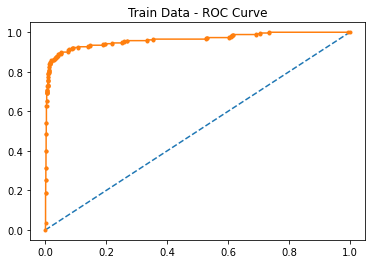



------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.9349662162162162


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1056
           1       0.86      0.48      0.61       128

    accuracy                           0.93      1184
   macro avg       0.90      0.73      0.79      1184
weighted avg       0.93      0.93      0.93      1184

------------------------------------------------------------




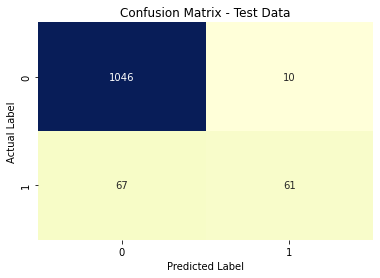



------------------------------------------------------------
AUC: 0.947


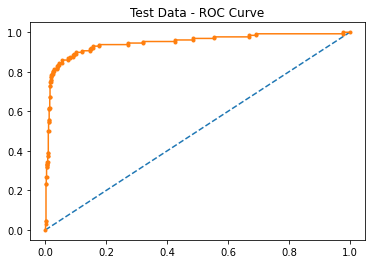



------------------------------------------------------------


In [320]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
final_logit_sklearn_scaled_metrics,best_model_lr=apply_evl("LogisticRegression_Scaled",lr,param_grid_lr_scaled,
                                     X_train_all_scaled,X_test_all_scaled,y_train_all_scaled,y_test_all_scaled)

In [321]:
final_logit_sklearn_scaled_metrics.T[['Accuracy','Precision','Recall','F1','AUC']]

Accuracy Precision    Recall        F1  \
LogisticRegression_Scaled_Train  0.947127  0.958333  0.532819  0.684864   
LogisticRegression_Scaled_Test   0.934966  0.859155  0.476562  0.613065   

                                      AUC  
LogisticRegression_Scaled_Train  0.962358  
LogisticRegression_Scaled_Test   0.947347

### Logit Using Sklearn - Unscaled With Smote

In [322]:
param_grid_lr_unscaled_smote={'penalty':['l1','l2', 'elasticnet', 'none'],
      'solver':['sag','lbfgs','liblinear','newton-cg','saga'],
      'tol':[0.0001,0.00001,0.000001,0.0000001,0.00000001],
      'max_iter':[100,200,300],
               'random_state':[0,1,21,23]}

LogisticRegression_With_Smote
--------------------Best Parameters--------------------
{'max_iter': 100, 'penalty': 'l1', 'random_state': 1, 'solver': 'liblinear', 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(penalty='l1', random_state=1, solver='liblinear')


Train Accuracy Score for model LogisticRegression() is 0.9281381241250584


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2143
           1       0.91      0.95      0.93      2143

    accuracy                           0.93      4286
   macro avg       0.93      0.93      0.93      4286
weighted avg       0.93      0.93      0.93      4286

------------------------------------------------------------




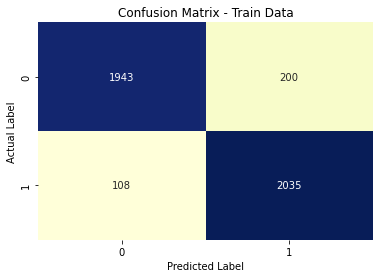



------------------------------------------------------------
AUC: 0.980


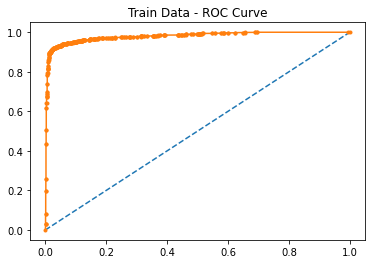



------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.9214015151515151


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1056
           1       0.90      0.95      0.92      1056

    accuracy                           0.92      2112
   macro avg       0.92      0.92      0.92      2112
weighted avg       0.92      0.92      0.92      2112

------------------------------------------------------------




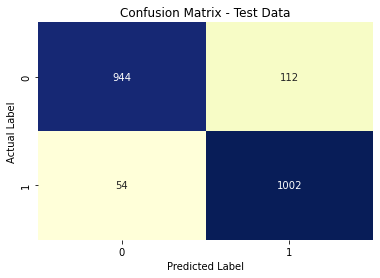



------------------------------------------------------------
AUC: 0.974


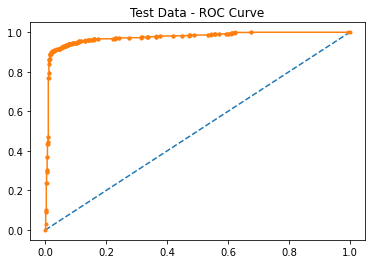



------------------------------------------------------------


In [323]:
from sklearn.linear_model import LogisticRegression
lr_smote = LogisticRegression()
final_logit_sklearn_unscalled_smote_metrics,best_model_lr_smote=apply_evl("LogisticRegression_With_Smote",lr_smote,
                                                                    param_grid_lr_unscaled_smote,
                                     X_train_smote,X_test_smote,y_train_smote,y_test_smote)

In [324]:
final_logit_sklearn_unscalled_smote_metrics.T[['Accuracy','Precision','Recall','F1','AUC']]

Accuracy Precision    Recall        F1  \
LogisticRegression_With_Smote_Train  0.928138  0.910515  0.949603  0.929648   
LogisticRegression_With_Smote_Test   0.921402  0.899461  0.948864  0.923502   

                                          AUC  
LogisticRegression_With_Smote_Train  0.979997  
LogisticRegression_With_Smote_Test   0.973695

### Logit Using Sklearn - Scaled With Smote

In [325]:
param_grid_lr_scaled_smote={'penalty':['l1','l2', 'elasticnet', 'none'],
      'solver':['sag','lbfgs','liblinear','newton-cg','saga'],
      'tol':[0.0001,0.00001,0.000001,0.0000001,0.00000001],
      'max_iter':[100,200,300],
               'random_state':[0,1,21,23]}

LogisticRegression_Scaled_With_Smote
--------------------Best Parameters--------------------
{'max_iter': 300, 'penalty': 'none', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001}


--------------------Best Model Params--------------------
LogisticRegression(max_iter=300, penalty='none', random_state=0)


Train Accuracy Score for model LogisticRegression() is 0.9307046196920206


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2143
           1       0.91      0.95      0.93      2143

    accuracy                           0.93      4286
   macro avg       0.93      0.93      0.93      4286
weighted avg       0.93      0.93      0.93      4286

------------------------------------------------------------




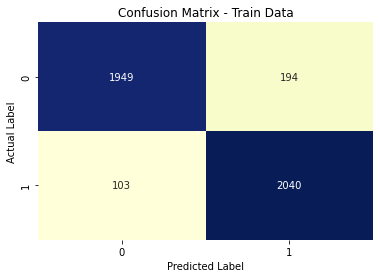



------------------------------------------------------------
AUC: 0.980


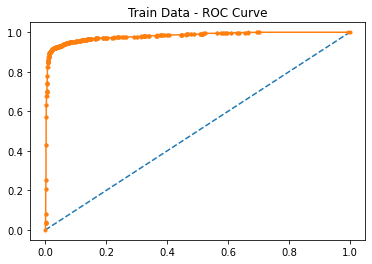



------------------------------------------------------------


Test Accuracy Score for model LogisticRegression() is 0.9237689393939394


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1056
           1       0.90      0.95      0.93      1056

    accuracy                           0.92      2112
   macro avg       0.92      0.92      0.92      2112
weighted avg       0.92      0.92      0.92      2112

------------------------------------------------------------




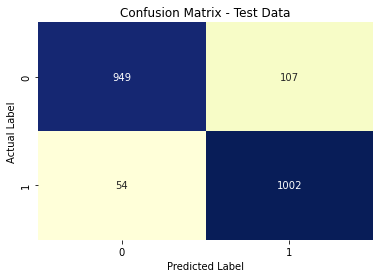



------------------------------------------------------------
AUC: 0.973


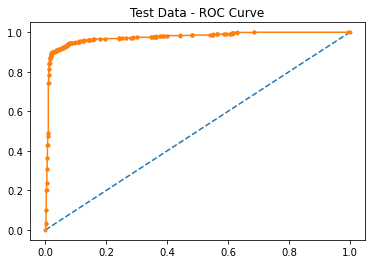



------------------------------------------------------------


In [326]:
from sklearn.linear_model import LogisticRegression
lr_smote = LogisticRegression()
final_logit_sklearn_scalled_smote_metrics,best_model_lr_smote=apply_evl("LogisticRegression_Scaled_With_Smote",
                                                                        lr_smote,
                                                                    param_grid_lr_scaled_smote,
                                     X_train_smote_all_scaled,X_test_smote_all_scaled,
                                                                        y_train_smote_all_scaled,
                                                                        y_test_smote_all_scaled)

In [327]:
final_logit_sklearn_scalled_smote_metrics.T[['Accuracy','Precision','Recall','F1','AUC']]

Accuracy Precision    Recall  \
LogisticRegression_Scaled_With_Smote_Train  0.930705   0.91316  0.951937   
LogisticRegression_Scaled_With_Smote_Test   0.923769  0.903517  0.948864   

                                                  F1       AUC  
LogisticRegression_Scaled_With_Smote_Train  0.932145  0.980486  
LogisticRegression_Scaled_With_Smote_Test   0.925635  0.973239

### Linear Discriminant Analysis using sklearn

Linear Discriminant Analysis (LDA) finds it's coefficients using the variation between the classes (check this), so the scaling doesn't matter.

In [328]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [329]:
param_grid_lda = {'solver': ['svd', 'lsqr', 'eigen'],
              'shrinkage': ['auto', 'none', 'default'],
              'tol': [0.000001, 0.0000001, 0.000000001]}

LDA
--------------------Best Parameters--------------------
{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 1e-06}


--------------------Best Model Params--------------------
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=1e-06)


Train Accuracy Score for model LinearDiscriminantAnalysis() is 0.892173189009159


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2143
           1       0.50      0.01      0.02       259

    accuracy                           0.89      2402
   macro avg       0.70      0.50      0.48      2402
weighted avg       0.85      0.89      0.84      2402

------------------------------------------------------------




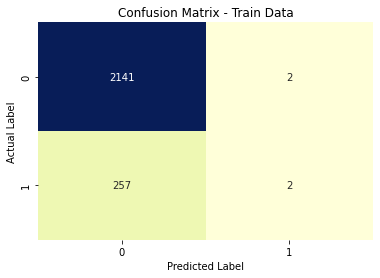



------------------------------------------------------------
AUC: 0.745


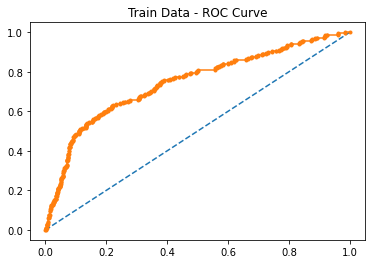



------------------------------------------------------------


Test Accuracy Score for model LinearDiscriminantAnalysis() is 0.8918918918918919


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1056
           1       0.50      0.02      0.03       128

    accuracy                           0.89      1184
   macro avg       0.70      0.51      0.49      1184
weighted avg       0.85      0.89      0.84      1184

------------------------------------------------------------




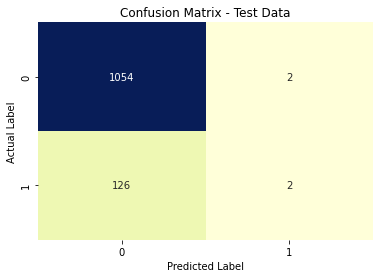



------------------------------------------------------------
AUC: 0.704


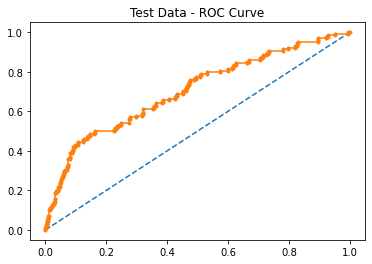



------------------------------------------------------------


In [330]:
lda = LinearDiscriminantAnalysis()
lda_metrics_df,best_model_lda=apply_evl("LDA",lda,param_grid_lda,X_train,X_test,
          y_train,y_test)

In [331]:
lda_metrics_df.T[['Accuracy','Precision','Recall','F1','AUC']]

Accuracy Precision    Recall        F1       AUC
LDA_Train  0.892173       0.5  0.007722  0.015209  0.745186
LDA_Test   0.891892       0.5  0.015625  0.030303  0.703843

LDA with Smote using sklearn

In [332]:
param_grid_lda_smote = {'solver': ['svd', 'lsqr', 'eigen'],
              'shrinkage': ['auto', 'none', 'default'],
              'tol': [0.000001, 0.0000001, 0.000000001]}

LDA_With_Smote
--------------------Best Parameters--------------------
{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 1e-06}


--------------------Best Model Params--------------------
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=1e-06)


Train Accuracy Score for model LinearDiscriminantAnalysis() is 0.6626224918338778


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.76      0.48      0.59      2143
           1       0.62      0.84      0.71      2143

    accuracy                           0.66      4286
   macro avg       0.69      0.66      0.65      4286
weighted avg       0.69      0.66      0.65      4286

------------------------------------------------------------




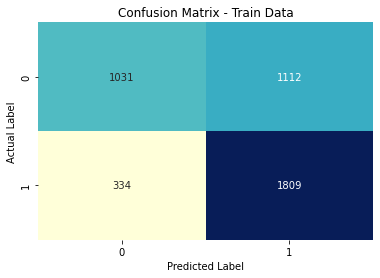



------------------------------------------------------------
AUC: 0.739


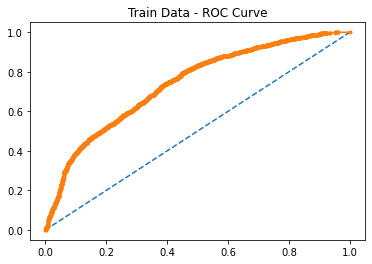



------------------------------------------------------------


Test Accuracy Score for model LinearDiscriminantAnalysis() is 0.6714015151515151


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.78      0.48      0.59      1056
           1       0.62      0.86      0.72      1056

    accuracy                           0.67      2112
   macro avg       0.70      0.67      0.66      2112
weighted avg       0.70      0.67      0.66      2112

------------------------------------------------------------




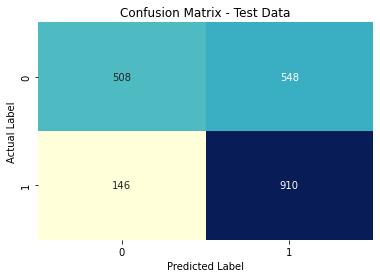



------------------------------------------------------------
AUC: 0.762


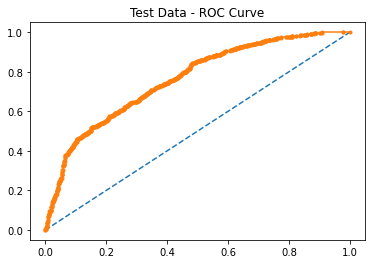



------------------------------------------------------------


In [333]:
lda_smote = LinearDiscriminantAnalysis()
lda_metrics_df_smote,best_model_lda_smote=apply_evl("LDA_With_Smote",lda_smote,param_grid_lda_smote,X_train_smote,
                                                    X_test_smote,y_train_smote,y_test_smote)

In [334]:
lda_metrics_df_smote.T[['Accuracy','Precision','Recall','F1','AUC']]

Accuracy Precision    Recall        F1       AUC
LDA_With_Smote_Train  0.662622  0.619308  0.844144  0.714455  0.739134
LDA_With_Smote_Test   0.671402  0.624143  0.861742  0.723946  0.762228

## Random Forest using sklearn

Tree based models are not distance based models and can handle varying ranges of features. Hence, Scaling is not required while modelling trees.

In [335]:
param_grid_rf = {
    'max_depth': [10,20,30],
    'max_features': [2,3,4,5,6,7,8],
    'min_samples_leaf': [25,50,75,100],
    'min_samples_split': [25,50,75,100],
    'n_estimators': [50,100,150]
}

RandomForest
--------------------Best Parameters--------------------
{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 50, 'min_samples_split': 75, 'n_estimators': 50}


--------------------Best Model Params--------------------
RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=50,
                       min_samples_split=75, n_estimators=50)


Train Accuracy Score for model RandomForestClassifier() is 0.980849292256453


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2143
           1       0.93      0.89      0.91       259

    accuracy                           0.98      2402
   macro avg       0.96      0.94      0.95      2402
weighted avg       0.98      0.98      0.98      2402

------------------------------------------------------------




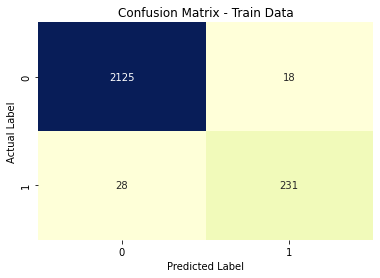



------------------------------------------------------------
AUC: 0.994


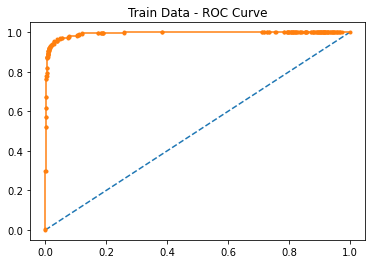



------------------------------------------------------------


Test Accuracy Score for model RandomForestClassifier() is 0.9755067567567568


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1056
           1       0.90      0.87      0.88       128

    accuracy                           0.98      1184
   macro avg       0.94      0.93      0.94      1184
weighted avg       0.98      0.98      0.98      1184

------------------------------------------------------------




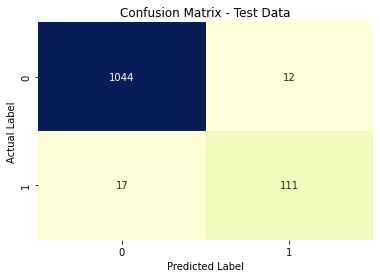



------------------------------------------------------------
AUC: 0.990


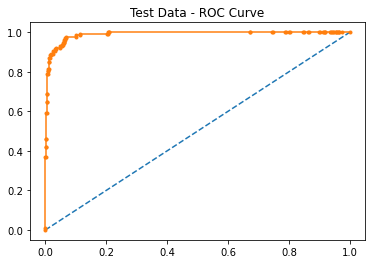



------------------------------------------------------------


In [336]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_metrics_df,best_model_rf=apply_evl("RandomForest",rf_model,param_grid_rf,
                                             X_train,X_test,y_train,y_test)

In [337]:
rf_metrics_df.T[['Accuracy','Precision','Recall','F1','AUC']]

Accuracy Precision    Recall        F1       AUC
RandomForest_Train  0.980849  0.927711  0.891892  0.909449  0.993687
RandomForest_Test   0.975507  0.902439  0.867188  0.884462  0.989975

### RandomFirst with Smote using sklearn

In [338]:
param_grid_rf_smote = {
    'max_depth': [10,20,30],
    'max_features': [2,3,4,5,6,7,8],
    'min_samples_leaf': [25,50,75,100],
    'min_samples_split': [25,50,75,100],
    'n_estimators': [50,100,150]
}

RF_With_Smote
--------------------Best Parameters--------------------
{'max_depth': 30, 'max_features': 7, 'min_samples_leaf': 25, 'min_samples_split': 50, 'n_estimators': 50}


--------------------Best Model Params--------------------
RandomForestClassifier(max_depth=30, max_features=7, min_samples_leaf=25,
                       min_samples_split=50, n_estimators=50)


Train Accuracy Score for model RandomForestClassifier() is 0.974335044330378


--------------------Classification Report - Train Data--------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2143
           1       0.98      0.97      0.97      2143

    accuracy                           0.97      4286
   macro avg       0.97      0.97      0.97      4286
weighted avg       0.97      0.97      0.97      4286

------------------------------------------------------------




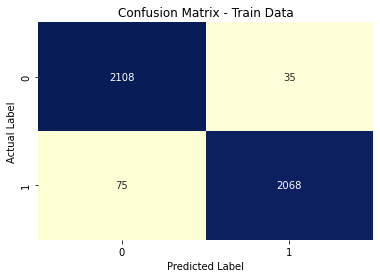



------------------------------------------------------------
AUC: 0.998


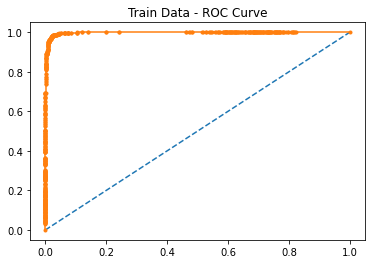



------------------------------------------------------------


Test Accuracy Score for model RandomForestClassifier() is 0.9678030303030303


--------------------Classification Report - Test Data--------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1056
           1       0.98      0.96      0.97      1056

    accuracy                           0.97      2112
   macro avg       0.97      0.97      0.97      2112
weighted avg       0.97      0.97      0.97      2112

------------------------------------------------------------




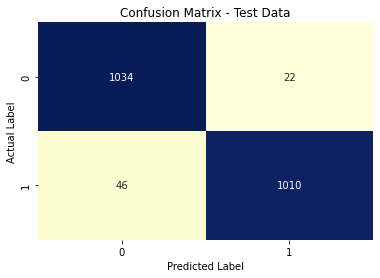



------------------------------------------------------------
AUC: 0.994


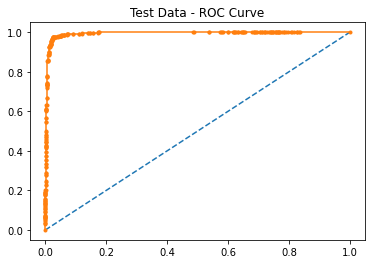



------------------------------------------------------------


In [339]:
from sklearn.ensemble import RandomForestClassifier
rf_model_smote = RandomForestClassifier()
rf_metrics_df_smote,best_model_rf_smote=apply_evl("RF_With_Smote",rf_model_smote,param_grid_rf_smote,
                                             X_train_smote,X_test_smote,
          y_train_smote,y_test_smote)

In [340]:
rf_metrics_df_smote.T[['Accuracy','Precision','Recall','F1','AUC']]

Accuracy Precision    Recall        F1       AUC
RF_With_Smote_Train  0.974335  0.983357  0.965002  0.974093  0.997926
RF_With_Smote_Test   0.967803  0.978682  0.956439  0.967433  0.994474

### Few modifications in column names

In [341]:
final_logit_sm_metrics.columns=['Accuracy','Precision','Recall','F1','AUC']
final_logit_sm_metrics

Accuracy  Precision    Recall        F1       AUC
Logit_SM_Train  0.974604   0.863971  0.907336  0.885122  0.965672
Logit_SM_Test   0.963682   0.819549  0.851562  0.835249  0.960138

In [342]:
final_logit_sm_smote_metrics.columns=['Accuracy','Precision','Recall','F1','AUC']
final_logit_sm_smote_metrics

Accuracy  Precision    Recall        F1       AUC
Logit_SM_Train_SMOTE  0.946104   0.973736  0.916939  0.944484  0.980490
Logit_SM_Test_SMOTE   0.936553   0.961924  0.909091  0.934761  0.973314

## Comparison

In [343]:
data_df=pd.concat([final_logit_sm_metrics,
                   final_logit_sm_smote_metrics, 
                   final_logit_sklearn_unscaled_metrics.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   final_logit_sklearn_scaled_metrics.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   final_logit_sklearn_unscalled_smote_metrics.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   final_logit_sklearn_scalled_smote_metrics.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   lda_metrics_df.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   lda_metrics_df_smote.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   rf_metrics_df.T[['Accuracy','Precision','Recall','F1','AUC']], 
                   rf_metrics_df_smote.T[['Accuracy','Precision','Recall','F1','AUC']]],axis=0)

In [344]:
data_df

Accuracy Precision    Recall  \
Logit_SM_Train                              0.974604  0.863971  0.907336   
Logit_SM_Test                               0.963682  0.819549  0.851562   
Logit_SM_Train_SMOTE                        0.946104  0.973736  0.916939   
Logit_SM_Test_SMOTE                         0.936553  0.961924  0.909091   
LogisticRegression_Unscaled_Train           0.970858  0.939535  0.779923   
LogisticRegression_Unscaled_Test            0.956081  0.865385  0.703125   
LogisticRegression_Scaled_Train             0.947127  0.958333  0.532819   
LogisticRegression_Scaled_Test              0.934966  0.859155  0.476562   
LogisticRegression_With_Smote_Train         0.928138  0.910515  0.949603   
LogisticRegression_With_Smote_Test          0.921402  0.899461  0.948864   
LogisticRegression_Scaled_With_Smote_Train  0.930705   0.91316  0.951937   
LogisticRegression_Scaled_With_Smote_Test   0.923769  0.903517  0.948864   
LDA_Train                                   0.892173       0.5  0.007722   
LDA_Test                                    0.891892       0.5  0.015625   
LDA_With_Smote_Train                        0.662622  0.619308  0.844144   
LDA_With_Smote_Test                         0.671402  0.624143  0.861742   
RandomForest_Train                          0.980849  0.927711  0.891892   
RandomForest_Test                           0.975507  0.902439  0.867188   
RF_With_Smote_Train                         0.974335  0.983357  0.965002   
RF_With_Smote_Test                          0.967803  0.978682  0.956439   

                                                  F1       AUC  
Logit_SM_Train                              0.885122  0.965672  
Logit_SM_Test                               0.835249  0.960138  
Logit_SM_Train_SMOTE                        0.944484   0.98049  
Logit_SM_Test_SMOTE                         0.934761  0.973314  
LogisticRegression_Unscaled_Train           0.852321  0.962838  
LogisticRegression_Unscaled_Test            0.775862   0.94215  
LogisticRegression_Scaled_Train             0.684864  0.962358  
LogisticRegression_Scaled_Test              0.613065  0.947347  
LogisticRegression_With_Smote_Train         0.929648  0.979997  
LogisticRegression_With_Smote_Test          0.923502  0.973695  
LogisticRegression_Scaled_With_Smote_Train  0.932145  0.980486  
LogisticRegression_Scaled_With_Smote_Test   0.925635  0.973239  
LDA_Train                                   0.015209  0.745186  
LDA_Test                                    0.030303  0.703843  
LDA_With_Smote_Train                        0.714455  0.739134  
LDA_With_Smote_Test                         0.723946  0.762228  
RandomForest_Train                          0.909449  0.993687  
RandomForest_Test                           0.884462  0.989975  
RF_With_Smote_Train                         0.974093  0.997926  
RF_With_Smote_Test                          0.967433  0.994474

### Best Models

In [345]:
data_df.sort_values(by='Accuracy',ascending=False)

Accuracy Precision    Recall  \
RandomForest_Train                          0.980849  0.927711  0.891892   
RandomForest_Test                           0.975507  0.902439  0.867188   
Logit_SM_Train                              0.974604  0.863971  0.907336   
RF_With_Smote_Train                         0.974335  0.983357  0.965002   
LogisticRegression_Unscaled_Train           0.970858  0.939535  0.779923   
RF_With_Smote_Test                          0.967803  0.978682  0.956439   
Logit_SM_Test                               0.963682  0.819549  0.851562   
LogisticRegression_Unscaled_Test            0.956081  0.865385  0.703125   
LogisticRegression_Scaled_Train             0.947127  0.958333  0.532819   
Logit_SM_Train_SMOTE                        0.946104  0.973736  0.916939   
Logit_SM_Test_SMOTE                         0.936553  0.961924  0.909091   
LogisticRegression_Scaled_Test              0.934966  0.859155  0.476562   
LogisticRegression_Scaled_With_Smote_Train  0.930705   0.91316  0.951937   
LogisticRegression_With_Smote_Train         0.928138  0.910515  0.949603   
LogisticRegression_Scaled_With_Smote_Test   0.923769  0.903517  0.948864   
LogisticRegression_With_Smote_Test          0.921402  0.899461  0.948864   
LDA_Train                                   0.892173       0.5  0.007722   
LDA_Test                                    0.891892       0.5  0.015625   
LDA_With_Smote_Test                         0.671402  0.624143  0.861742   
LDA_With_Smote_Train                        0.662622  0.619308  0.844144   

                                                  F1       AUC  
RandomForest_Train                          0.909449  0.993687  
RandomForest_Test                           0.884462  0.989975  
Logit_SM_Train                              0.885122  0.965672  
RF_With_Smote_Train                         0.974093  0.997926  
LogisticRegression_Unscaled_Train           0.852321  0.962838  
RF_With_Smote_Test                          0.967433  0.994474  
Logit_SM_Test                               0.835249  0.960138  
LogisticRegression_Unscaled_Test            0.775862   0.94215  
LogisticRegression_Scaled_Train             0.684864  0.962358  
Logit_SM_Train_SMOTE                        0.944484   0.98049  
Logit_SM_Test_SMOTE                         0.934761  0.973314  
LogisticRegression_Scaled_Test              0.613065  0.947347  
LogisticRegression_Scaled_With_Smote_Train  0.932145  0.980486  
LogisticRegression_With_Smote_Train         0.929648  0.979997  
LogisticRegression_Scaled_With_Smote_Test   0.925635  0.973239  
LogisticRegression_With_Smote_Test          0.923502  0.973695  
LDA_Train                                   0.015209  0.745186  
LDA_Test                                    0.030303  0.703843  
LDA_With_Smote_Test                         0.723946  0.762228  
LDA_With_Smote_Train                        0.714455  0.739134

In [346]:
data_df.sort_values(by='AUC',ascending=False)

Accuracy Precision    Recall  \
RF_With_Smote_Train                         0.974335  0.983357  0.965002   
RF_With_Smote_Test                          0.967803  0.978682  0.956439   
RandomForest_Train                          0.980849  0.927711  0.891892   
RandomForest_Test                           0.975507  0.902439  0.867188   
Logit_SM_Train_SMOTE                        0.946104  0.973736  0.916939   
LogisticRegression_Scaled_With_Smote_Train  0.930705   0.91316  0.951937   
LogisticRegression_With_Smote_Train         0.928138  0.910515  0.949603   
LogisticRegression_With_Smote_Test          0.921402  0.899461  0.948864   
Logit_SM_Test_SMOTE                         0.936553  0.961924  0.909091   
LogisticRegression_Scaled_With_Smote_Test   0.923769  0.903517  0.948864   
Logit_SM_Train                              0.974604  0.863971  0.907336   
LogisticRegression_Unscaled_Train           0.970858  0.939535  0.779923   
LogisticRegression_Scaled_Train             0.947127  0.958333  0.532819   
Logit_SM_Test                               0.963682  0.819549  0.851562   
LogisticRegression_Scaled_Test              0.934966  0.859155  0.476562   
LogisticRegression_Unscaled_Test            0.956081  0.865385  0.703125   
LDA_With_Smote_Test                         0.671402  0.624143  0.861742   
LDA_Train                                   0.892173       0.5  0.007722   
LDA_With_Smote_Train                        0.662622  0.619308  0.844144   
LDA_Test                                    0.891892       0.5  0.015625   

                                                  F1       AUC  
RF_With_Smote_Train                         0.974093  0.997926  
RF_With_Smote_Test                          0.967433  0.994474  
RandomForest_Train                          0.909449  0.993687  
RandomForest_Test                           0.884462  0.989975  
Logit_SM_Train_SMOTE                        0.944484   0.98049  
LogisticRegression_Scaled_With_Smote_Train  0.932145  0.980486  
LogisticRegression_With_Smote_Train         0.929648  0.979997  
LogisticRegression_With_Smote_Test          0.923502  0.973695  
Logit_SM_Test_SMOTE                         0.934761  0.973314  
LogisticRegression_Scaled_With_Smote_Test   0.925635  0.973239  
Logit_SM_Train                              0.885122  0.965672  
LogisticRegression_Unscaled_Train           0.852321  0.962838  
LogisticRegression_Scaled_Train             0.684864  0.962358  
Logit_SM_Test                               0.835249  0.960138  
LogisticRegression_Scaled_Test              0.613065  0.947347  
LogisticRegression_Unscaled_Test            0.775862   0.94215  
LDA_With_Smote_Test                         0.723946  0.762228  
LDA_Train                                   0.015209  0.745186  
LDA_With_Smote_Train                        0.714455  0.739134  
LDA_Test                                    0.030303  0.703843

### Best Model on Train Data

In [347]:
data_df[0::2].sort_values(by='Accuracy',ascending=False)

Accuracy Precision    Recall  \
RandomForest_Train                          0.980849  0.927711  0.891892   
Logit_SM_Train                              0.974604  0.863971  0.907336   
RF_With_Smote_Train                         0.974335  0.983357  0.965002   
LogisticRegression_Unscaled_Train           0.970858  0.939535  0.779923   
LogisticRegression_Scaled_Train             0.947127  0.958333  0.532819   
Logit_SM_Train_SMOTE                        0.946104  0.973736  0.916939   
LogisticRegression_Scaled_With_Smote_Train  0.930705   0.91316  0.951937   
LogisticRegression_With_Smote_Train         0.928138  0.910515  0.949603   
LDA_Train                                   0.892173       0.5  0.007722   
LDA_With_Smote_Train                        0.662622  0.619308  0.844144   

                                                  F1       AUC  
RandomForest_Train                          0.909449  0.993687  
Logit_SM_Train                              0.885122  0.965672  
RF_With_Smote_Train                         0.974093  0.997926  
LogisticRegression_Unscaled_Train           0.852321  0.962838  
LogisticRegression_Scaled_Train             0.684864  0.962358  
Logit_SM_Train_SMOTE                        0.944484   0.98049  
LogisticRegression_Scaled_With_Smote_Train  0.932145  0.980486  
LogisticRegression_With_Smote_Train         0.929648  0.979997  
LDA_Train                                   0.015209  0.745186  
LDA_With_Smote_Train                        0.714455  0.739134

### Best Model on Test Data

In [348]:
data_df[1::2].sort_values(by='Accuracy',ascending=False)

Accuracy Precision    Recall  \
RandomForest_Test                          0.975507  0.902439  0.867188   
RF_With_Smote_Test                         0.967803  0.978682  0.956439   
Logit_SM_Test                              0.963682  0.819549  0.851562   
LogisticRegression_Unscaled_Test           0.956081  0.865385  0.703125   
Logit_SM_Test_SMOTE                        0.936553  0.961924  0.909091   
LogisticRegression_Scaled_Test             0.934966  0.859155  0.476562   
LogisticRegression_Scaled_With_Smote_Test  0.923769  0.903517  0.948864   
LogisticRegression_With_Smote_Test         0.921402  0.899461  0.948864   
LDA_Test                                   0.891892       0.5  0.015625   
LDA_With_Smote_Test                        0.671402  0.624143  0.861742   

                                                 F1       AUC  
RandomForest_Test                          0.884462  0.989975  
RF_With_Smote_Test                         0.967433  0.994474  
Logit_SM_Test                              0.835249  0.960138  
LogisticRegression_Unscaled_Test           0.775862   0.94215  
Logit_SM_Test_SMOTE                        0.934761  0.973314  
LogisticRegression_Scaled_Test             0.613065  0.947347  
LogisticRegression_Scaled_With_Smote_Test  0.925635  0.973239  
LogisticRegression_With_Smote_Test         0.923502  0.973695  
LDA_Test                                   0.030303  0.703843  
LDA_With_Smote_Test                        0.723946  0.762228

In [349]:
data_df['Accuracy']

Logit_SM_Train                                0.974604
Logit_SM_Test                                 0.963682
Logit_SM_Train_SMOTE                          0.946104
Logit_SM_Test_SMOTE                           0.936553
LogisticRegression_Unscaled_Train             0.970858
LogisticRegression_Unscaled_Test              0.956081
LogisticRegression_Scaled_Train               0.947127
LogisticRegression_Scaled_Test                0.934966
LogisticRegression_With_Smote_Train           0.928138
LogisticRegression_With_Smote_Test            0.921402
LogisticRegression_Scaled_With_Smote_Train    0.930705
LogisticRegression_Scaled_With_Smote_Test     0.923769
LDA_Train                                     0.892173
LDA_Test                                      0.891892
LDA_With_Smote_Train                          0.662622
LDA_With_Smote_Test                           0.671402
RandomForest_Train                            0.980849
RandomForest_Test                             0.975507
RF_With_Sm

In [350]:
data_df_org=data_df.copy()

In [351]:
data_df.Accuracy=data_df.Accuracy.astype(float)

In [352]:
data_df.Precision=data_df.Precision.astype(float)
data_df.Recall=data_df.Recall.astype(float)
data_df.F1=data_df.F1.astype(float)
data_df.AUC=data_df.AUC.astype(float)

In [353]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Logit_SM_Train to RF_With_Smote_Test
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Accuracy   20 non-null     float64
 1   Precision  20 non-null     float64
 2   Recall     20 non-null     float64
 3   F1         20 non-null     float64
 4   AUC        20 non-null     float64
dtypes: float64(5)
memory usage: 1.5+ KB


### Comparison

<AxesSubplot:>

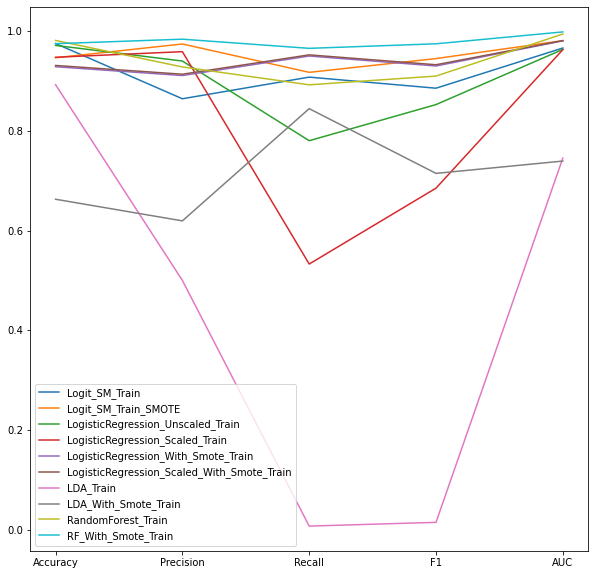

In [354]:
plt.figure(figsize=(10,10))
sns.lineplot(data=data_df[0::2].T,dashes=False)

<AxesSubplot:>

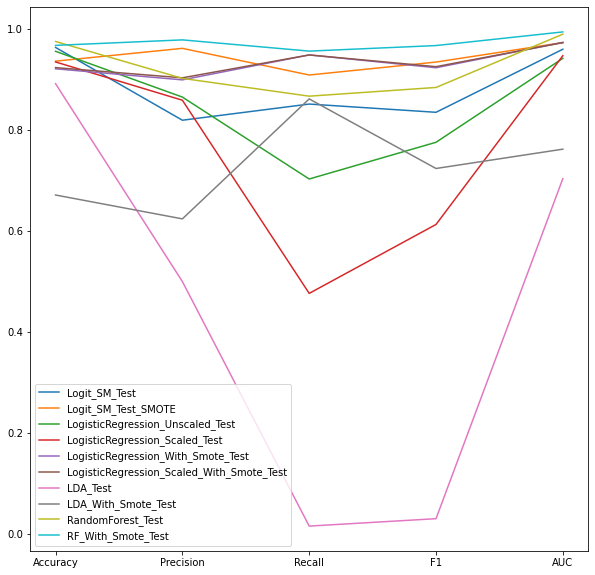

In [355]:
plt.figure(figsize=(10,10))
sns.lineplot(data=data_df[1::2].T,dashes=False)